<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/hands_on_ml/EDA/Titanic_roc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn.tree as DecisionTreeRegressor
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
## This is preferable for retina display. 

import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning
#import os ## imporing os
#print(os.listdir(r"/content/Titanic"))


In [ ]:
# This creats a new folder and imports data

#make new folder named NewFolder
!mkdir NewFolder
#goes inside NewFolder
%cd NewFolder
#list the files inside the folder
!ls


#Can be used to rename NewFolder to Titanic
!mv /content/NewFolder /content/Titanic


#impors the files to the NewFolder
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
!ls

/content/NewFolder


Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "gender_submission.csv" with length 3258 bytes
User uploaded file "test.csv" with length 28629 bytes
User uploaded file "train.csv" with length 61194 bytes
gender_submission.csv  test.csv  train.csv


In [ ]:
!ls

gender_submission.csv  test.csv  train.csv


In [ ]:
!ls
#!mv /content/NewFolder /content/Titanic
#!ls
#%cd Titanic
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.keys())
print(test.keys())

gender_submission.csv  test.csv  train.csv
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
242,243,0,2,"Coleridge, Mr. Reginald Charles",male,29.0,0,0,W./C. 14263,10.5000,NaN,S
347,348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
707,708,1,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,PC 17476,26.2875,E24,S


In [ ]:
test.sample(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,1167,2,"Bryhl, Miss. Dagmar Jenny Ingeborg",female,20.0,1,0,236853,26.0000,NaN,S
175,1067,2,"Brown, Miss. Edith Eileen",female,15.0,0,2,29750,39.0000,NaN,S
386,1278,3,"Aronsson, Mr. Ernst Axel Algot",male,24.0,0,0,349911,7.7750,NaN,S
27,919,3,"Daher, Mr. Shedid",male,22.5,0,0,2698,7.2250,NaN,C
327,1219,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46.0,0,0,PC 17585,79.2000,NaN,C
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
376,1268,3,"Kink, Miss. Maria",female,22.0,2,0,315152,8.6625,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S
70,962,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,NaN,Q
31,923,2,"Jefferys, Mr. Clifford Thomas",male,24.0,2,0,C.A. 31029,31.5000,NaN,S


In [ ]:
print("the shape of train data set:"+str(train.shape))
print(train.info())
print("the shape of train data set:"+str(test.shape))
print(test.info())

the shape of train data set:(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
the shape of train data set:(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 no

In [ ]:
print(train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
print(train.info())
print("*"*40)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

In [ ]:
#total=train.isnull()
#print(total)
total=train.isnull().sum().sort_values(ascending=False)
#print(total)

percent=round(train.isnull().sum().sort_values(ascending=False)/len(train)*100,2)
#print(percent)
pd.concat([total,percent],axis=1,keys=['Total','Percent'])

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [ ]:
#total=train.isnull()
#print(total)
total=test.isnull().sum().sort_values(ascending=False)
#print(total)

percent=round(test.isnull().sum().sort_values(ascending=False)/len(test)*100,2)
#print(percent)
pd.concat([total,percent],axis=1,keys=['Total','Percent'])

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [ ]:
percent=pd.DataFrame(round(train.Embarked.value_counts(dropna=False,normalize=True)*100,2))
print(percent)

total=pd.DataFrame(train.Embarked.value_counts(dropna=False))
print(total)
pd.concat([total.Embarked,percent.Embarked],keys=['Total','Percent'],axis=1)

     Embarked
S       72.28
C       18.86
Q        8.64
NaN      0.22
     Embarked
S         644
C         168
Q          77
NaN         2


,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [ ]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
t1 = train[train.Survived == 1]
print(t1.shape)
t2 = t1[t1.Sex == 'female']
t3 = t2[t2.Pclass == 1]
print(t3.shape)
# print(t3[t3.Embarked=='S'].PassengerId)
# print(t3[t3.Embarked=='C'].PassengerId)

t3.Embarked.value_counts(dropna=False)

(342, 12)
(91, 12)


S      46
C      42
NaN     2
Q       1
Name: Embarked, dtype: int64

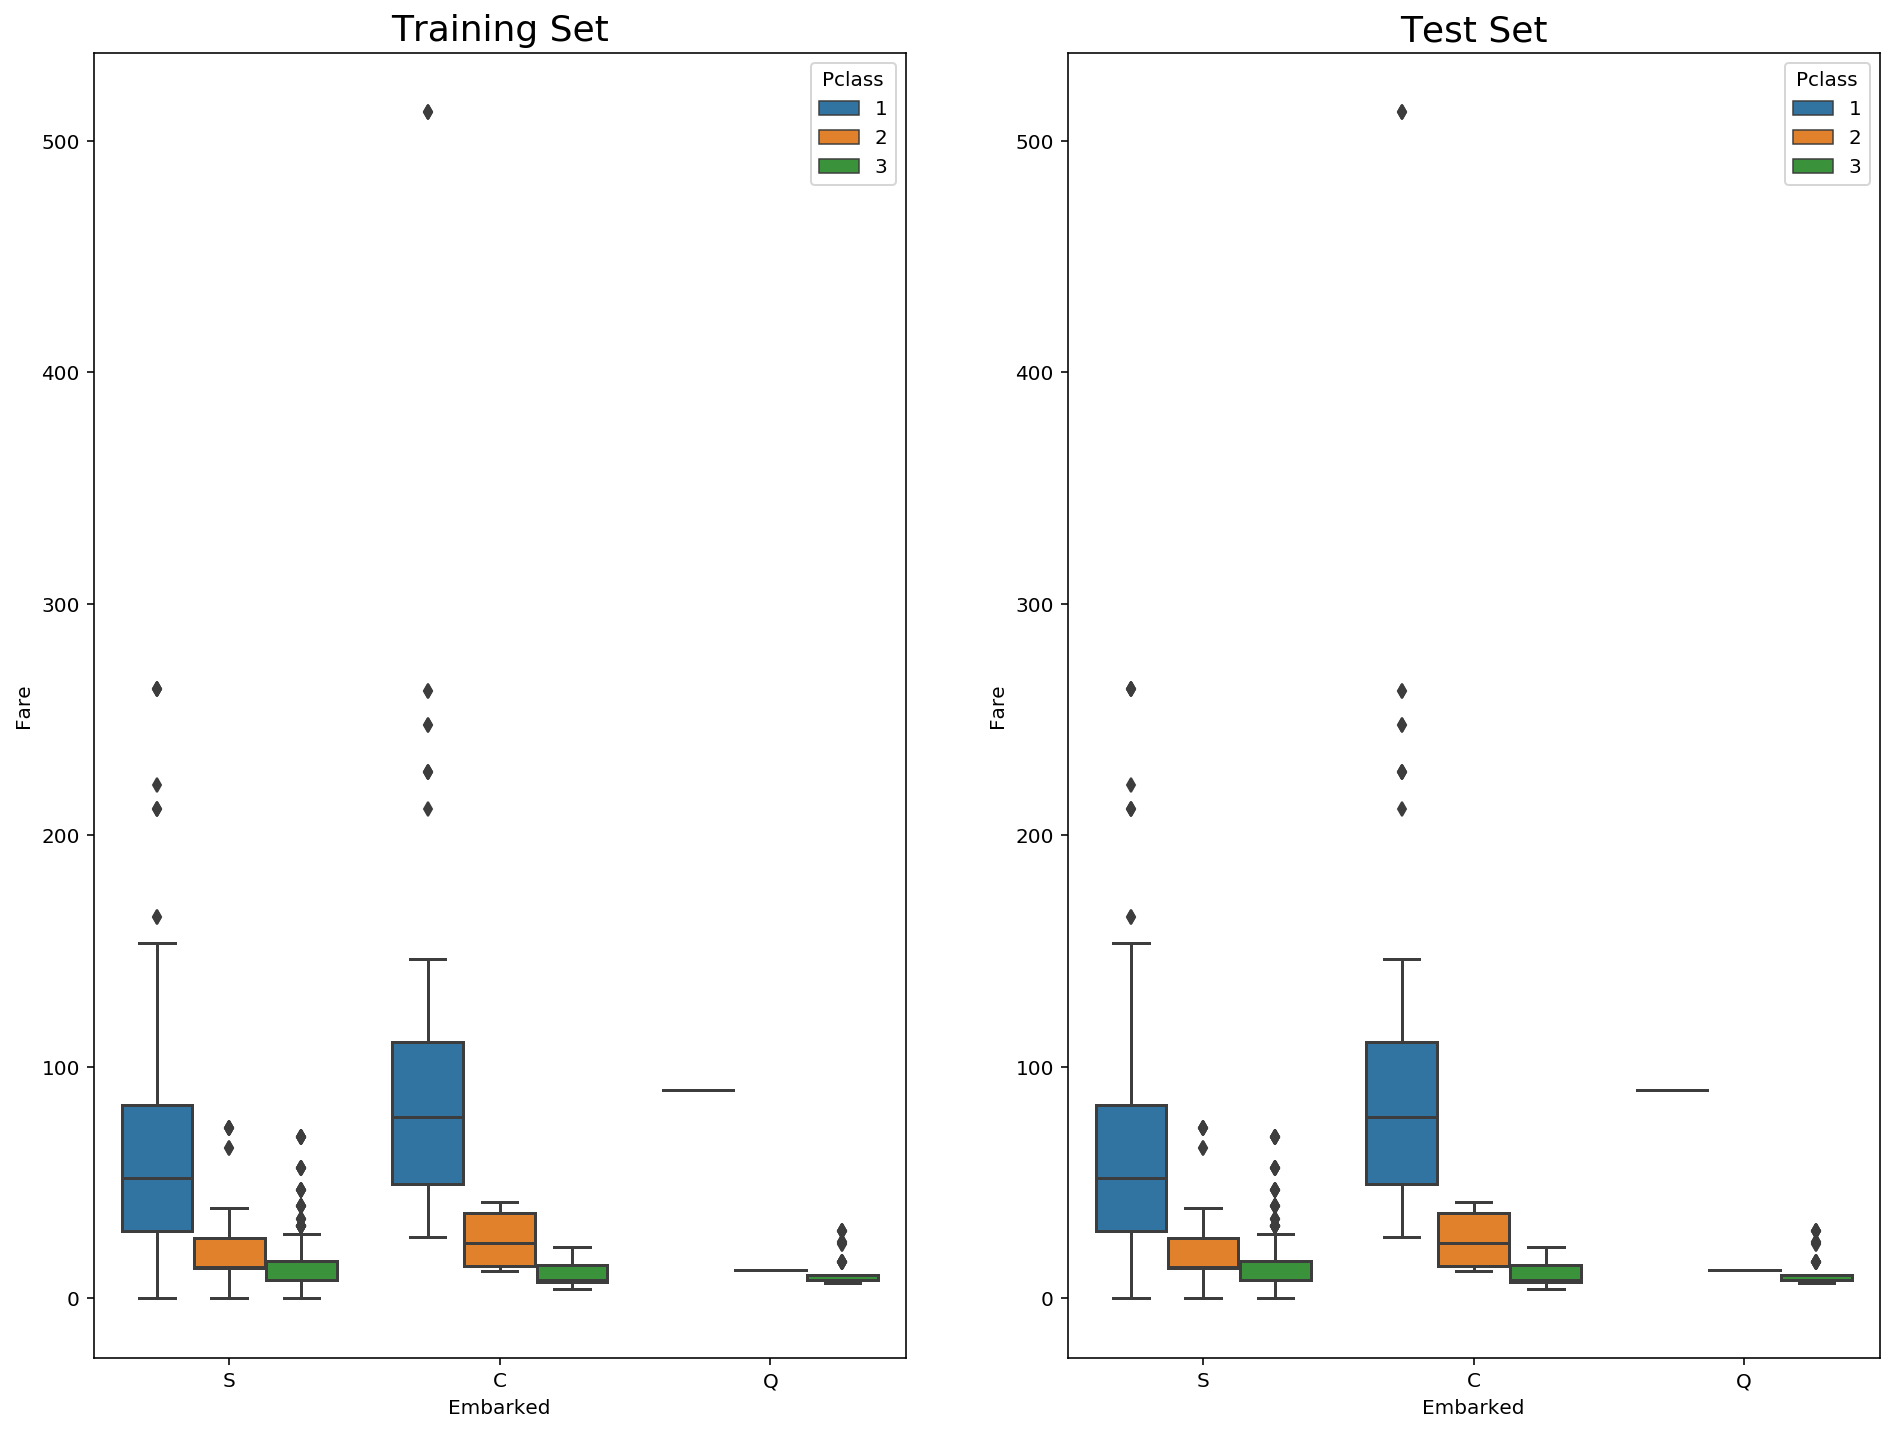

In [ ]:
fig, ax =plt.subplots(figsize=(16,12), ncols=2,nrows=1)
ax1=sns.boxplot(x="Embarked",y="Fare",hue="Pclass", data=train,ax=ax[0])
ax2=sns.boxplot(x="Embarked",y="Fare",hue="Pclass", data=train,ax=ax[1])
ax1.set_title("Training Set",fontsize=18)
ax2.set_title("Test Set",fontsize=18)
fig.show()

In [ ]:
train.Embarked.fillna("C",inplace=True)
print(train.shape)

(891, 12)


In [ ]:
print("train Cabin missing :" + str(train.Cabin.isnull().sum()/len(train.Cabin)))
print("test cabin missing :" + str(test.Cabin.isnull().sum()/len(test.Cabin)))

train Cabin missing :0.7710437710437711
test cabin missing :0.7822966507177034


In [ ]:
train1 = train
survivers = train["Survived"]
train.drop(["Survived"], axis=1, inplace=True)
all_data = pd.concat([train, test], ignore_index=False)
all_data.Cabin.fillna("N", inplace=True)

In [ ]:
#all_data.Cabin = [i[0] for i in all_data.Cabin]
all_data.shape

(1309, 11)

In [ ]:
all_data.Cabin=[i[0] for i in all_data.Cabin]
with_N=all_data[all_data.Cabin=='N']
without_N=all_data[all_data.Cabin != 'N']
all_data.groupby("Cabin")["Fare"].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [ ]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a


In [ ]:
with_N['Cabin']=with_N.Fare.apply(lambda x: cabin_estimator(x))

In [ ]:
all_data = pd.concat([with_N, without_N], axis=0)
all_data.sort_values(by='PassengerId', inplace=True)
train = all_data[:891]
test = all_data[891:]
train["Survived"]=survivers

In [ ]:
train[train.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


In [ ]:
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [ ]:
missing_value=test[(test.Sex=="male") & (test.Pclass==3)& (test.Embarked=='S')].Fare.mean()
test.Fare.fillna(missing_value, inplace=True)

In [ ]:
print("Train age missing values: "+str(round(train.Age.isnull().sum()/len(train)*100,2)))
print("Test age missing values: " +str(round(test.Age.isnull().sum()/len(test)*100,2)))

Train age missing values: 19.87
Test age missing values: 20.57


In [ ]:
train.Age.value_counts(dropna=False)


NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
19.00     25
30.00     25
21.00     24
25.00     23
36.00     22
29.00     20
32.00     18
26.00     18
35.00     18
27.00     18
16.00     17
31.00     17
34.00     15
23.00     15
33.00     15
20.00     15
39.00     14
17.00     13
42.00     13
40.00     13
45.00     12
38.00     11
50.00     10
2.00      10
4.00      10
        ... 
28.50      2
63.00      2
0.83       2
30.50      2
70.00      2
57.00      2
0.75       2
13.00      2
59.00      2
10.00      2
64.00      2
40.50      2
45.50      2
32.50      2
20.50      1
24.50      1
0.67       1
70.50      1
0.92       1
74.00      1
34.50      1
14.50      1
80.00      1
12.00      1
53.00      1
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [ ]:
train.Age.value_counts(dropna=False,bins=8)

(20.315, 30.263]    230
(30.263, 40.21]     155
(10.368, 20.315]    115
(40.21, 50.158]      86
(0.339, 10.368]      64
(50.158, 60.105]     42
(60.105, 70.052]     17
(70.052, 80.0]        5
Name: Age, dtype: int64

In [ ]:
train[train.Age.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,G,Q,0
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,G,S,1
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,G,C,1
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,G,C,0
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,G,Q,1
29,30,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,G,S,0
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B,C,1
32,33,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,G,Q,1
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,G,C,1
42,43,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,G,C,0


Percentage  of females survied: 0.74
Percentage  of males survied: 0.19


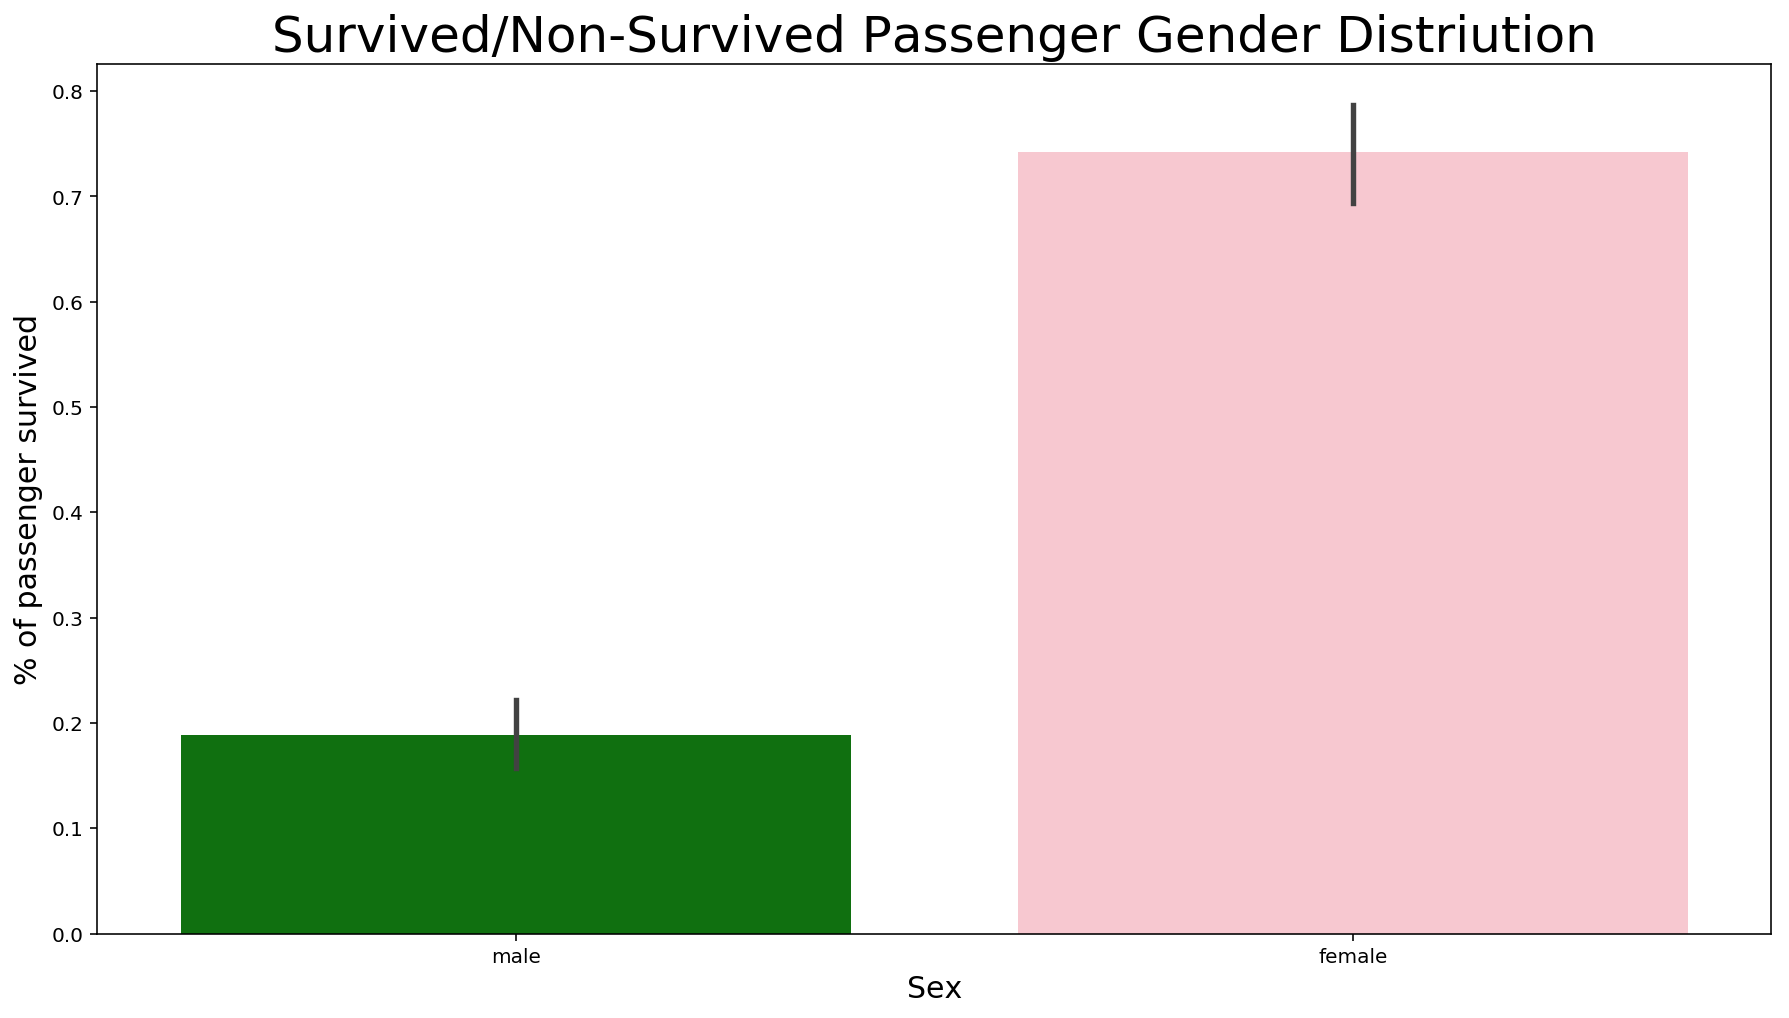

In [ ]:
print("Percentage  of females survied: " +
      str(round(train[train.Sex == "female"].Survived.sum()/len(train[train.Sex == "female"]), 2)))
print("Percentage  of males survied: " +
      str(round(train[train.Sex == "male"].Survived.sum()/len(train[train.Sex == "male"]), 2)))

pal = {'male': "green", 'female': "pink"}
plt.subplots(figsize=(15, 8))
ax = sns.barplot(x="Sex",
                 y="Survived",
                 data=train,
                 palette=pal,
                 linewidth=2)
plt.title("Survived/Non-Survived Passenger Gender Distriution", fontsize=25)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);

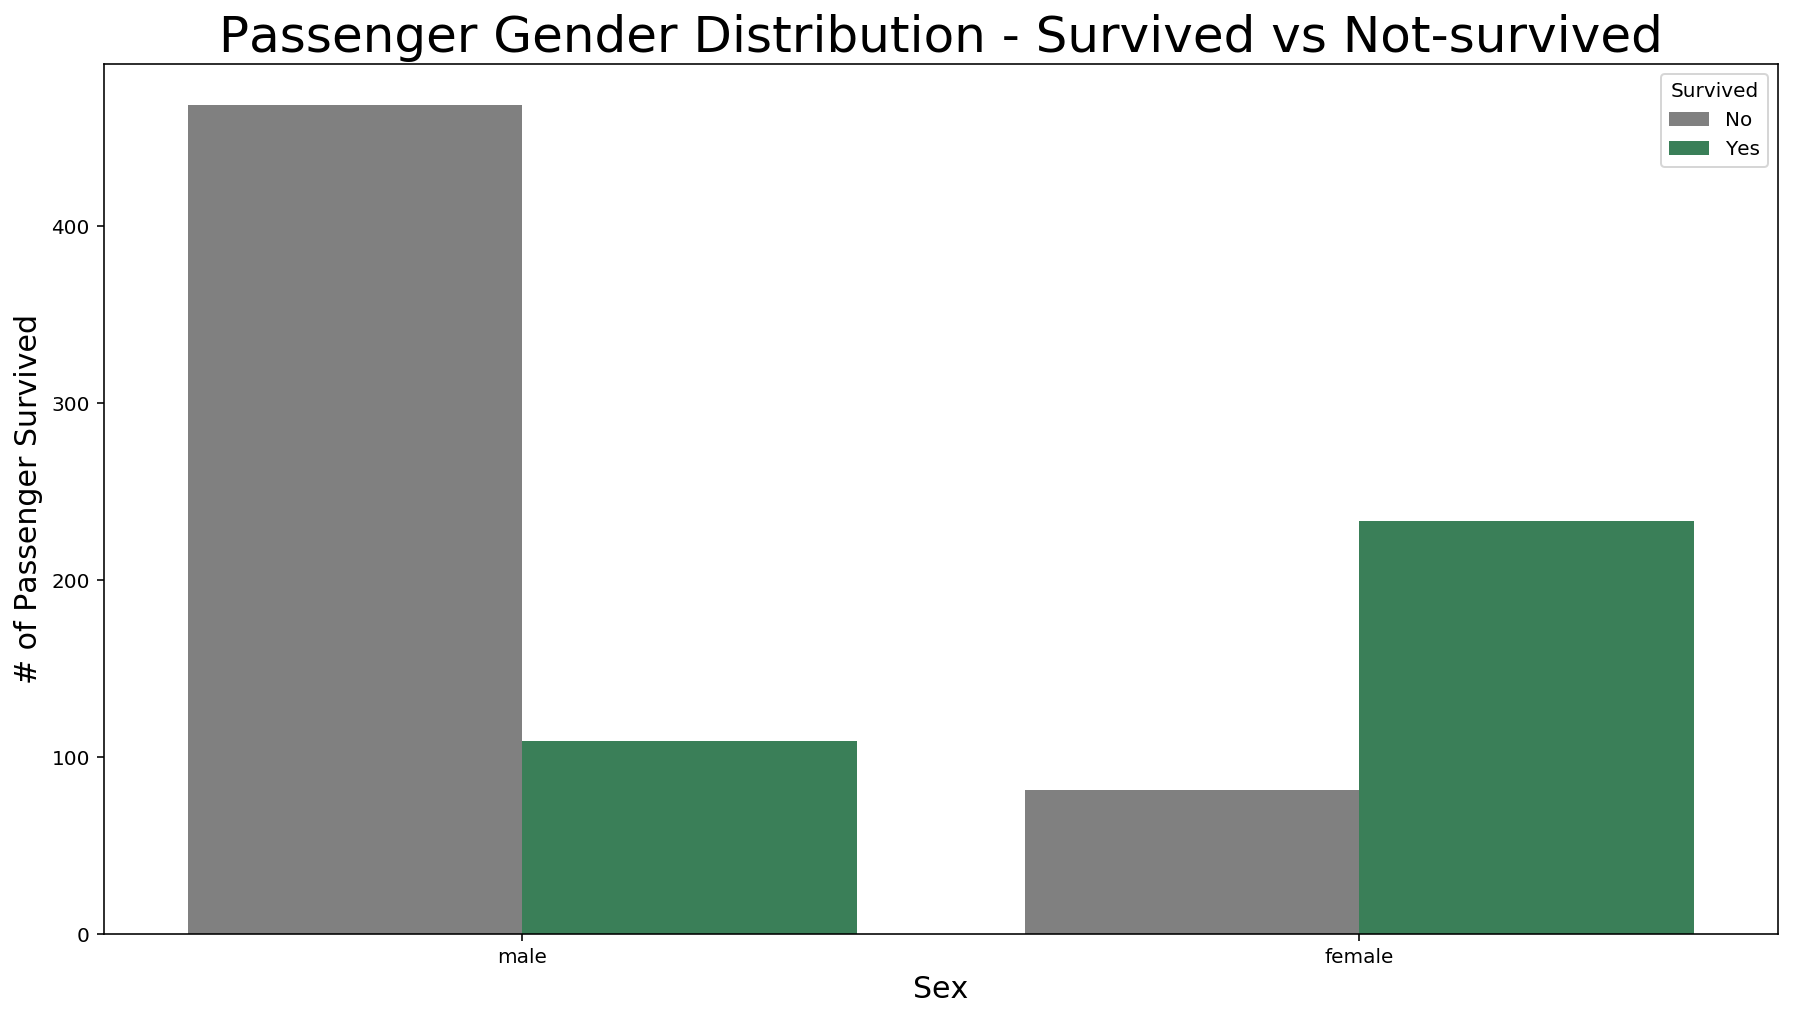

In [ ]:
pal={1:"seagreen", 0:"gray"}
plt.subplots(figsize=(15,8))
ax=sns.countplot(x="Sex",
              hue="Survived",
              data=train,
              linewidth=2,
              palette=pal
)
plt.title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 25)
plt.xlabel("Sex", fontsize = 15);
plt.ylabel("# of Passenger Survived", fontsize = 15)
## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Survived")
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

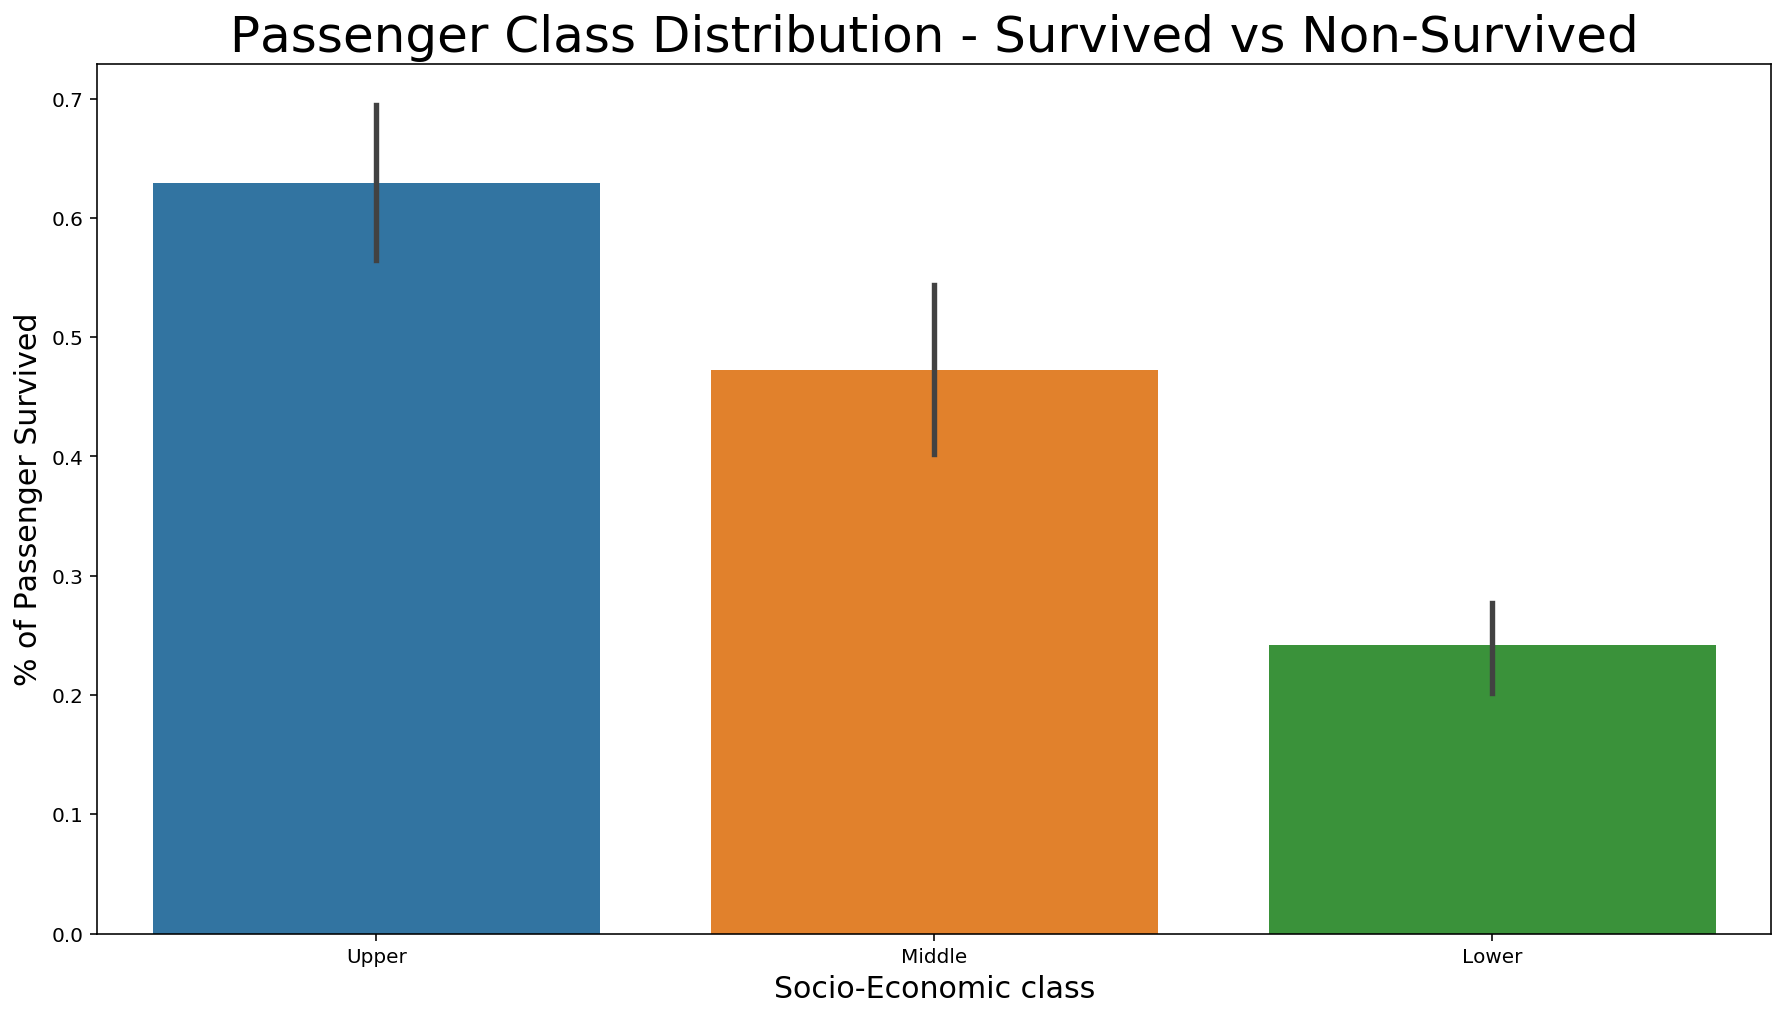

In [ ]:

plt.subplots(figsize=(15,8))
sns.barplot(x="Pclass",y="Survived",data=train,linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);

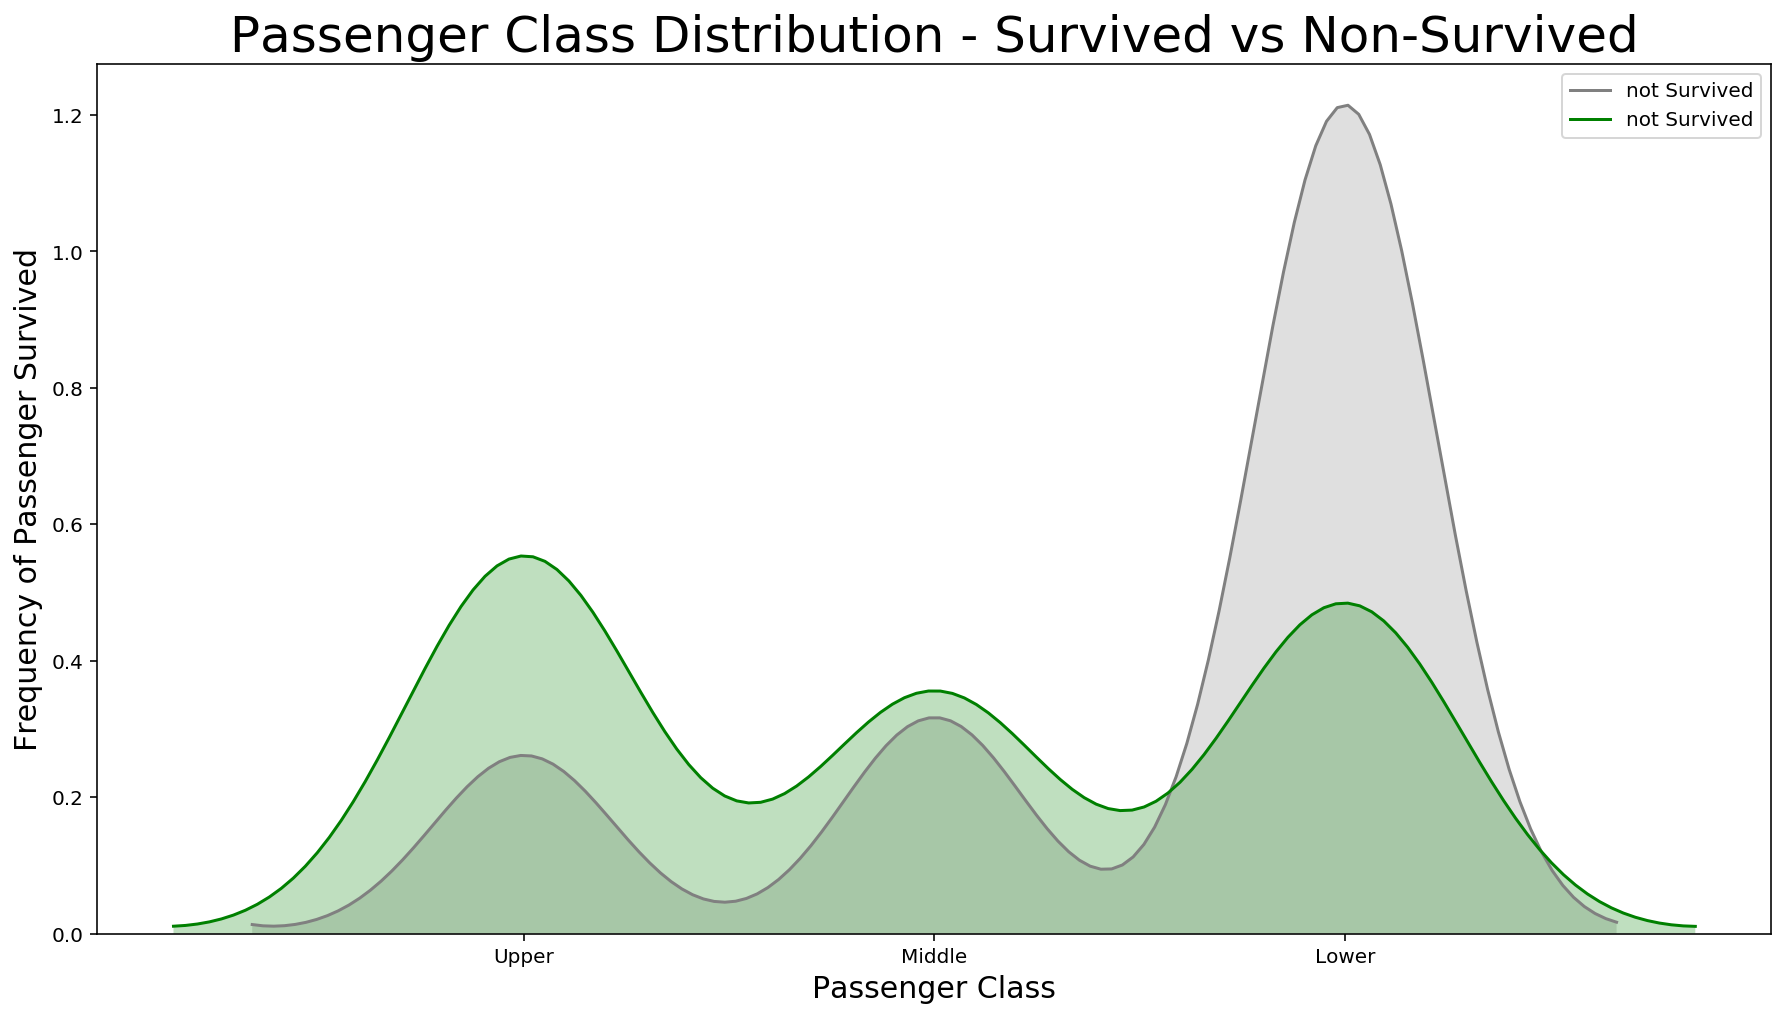

In [ ]:
fig=plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.Pclass[train.Survived==0],
               color='gray',
               shade=True,
               label='not Survived')
ax=sns.kdeplot(train.Pclass[train.Survived==1],
               color='g',
               shade=True,
               label='not Survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

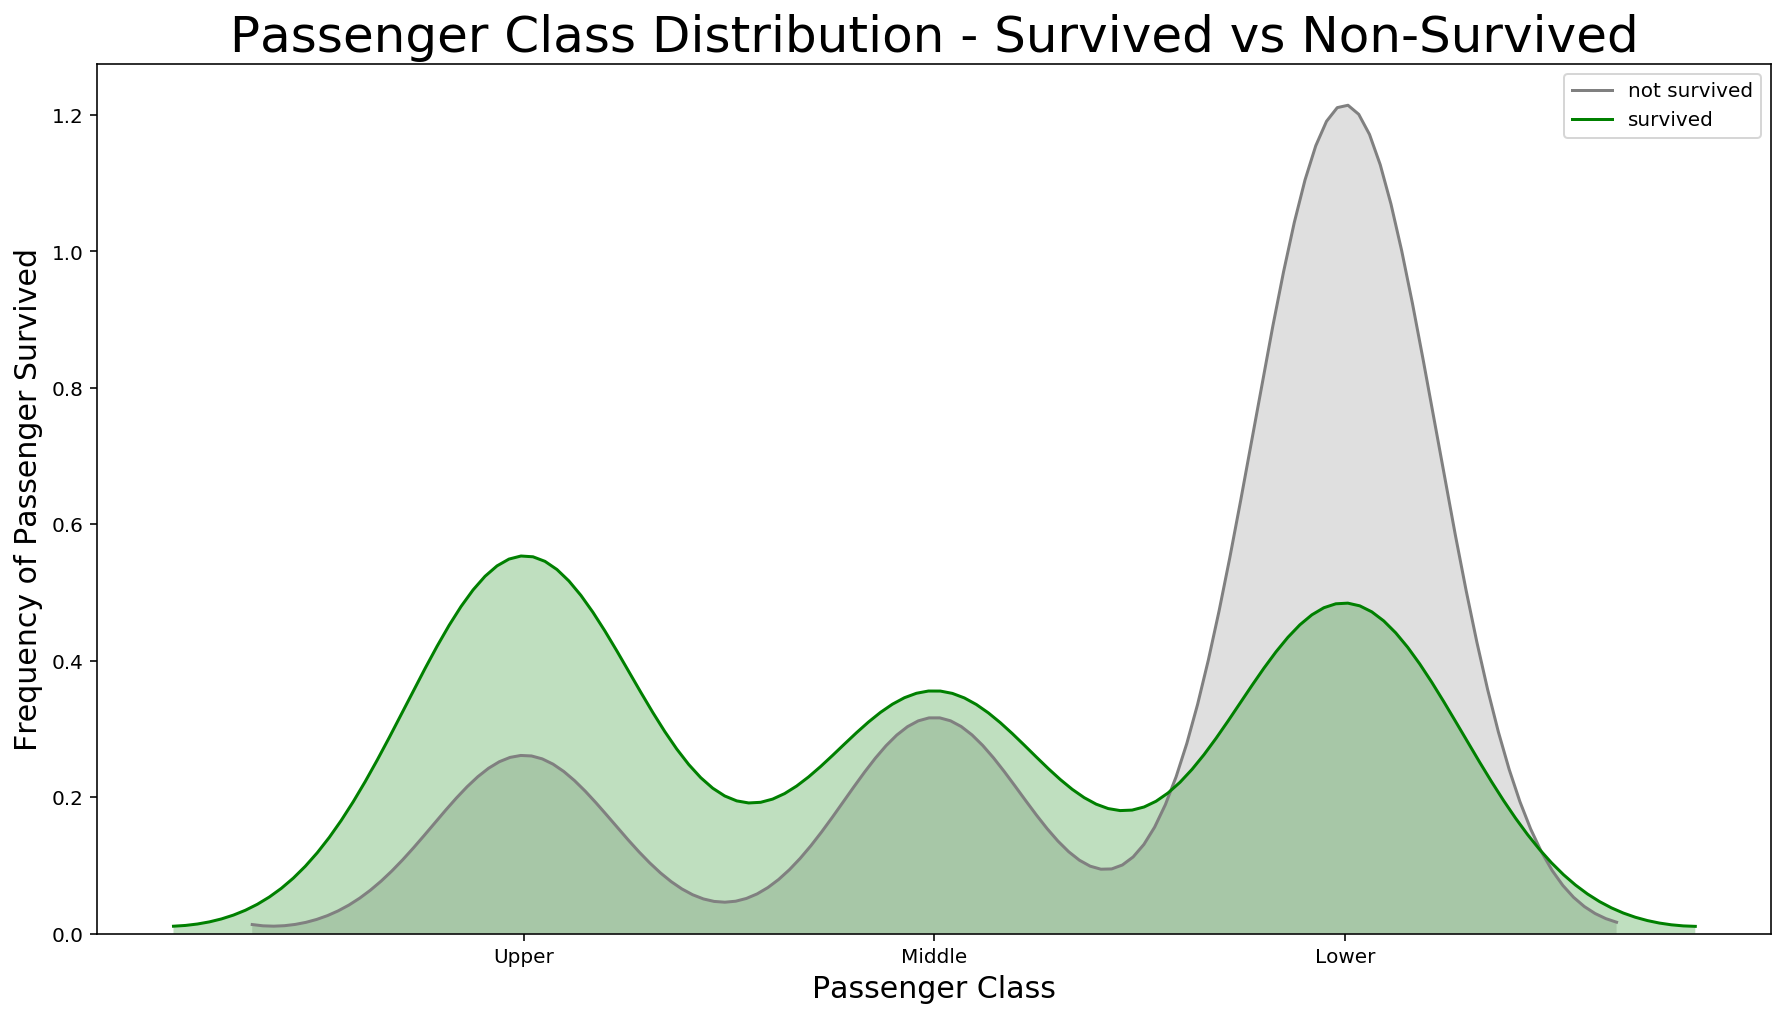

In [ ]:
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

Text(0.5, 0, 'Fare')

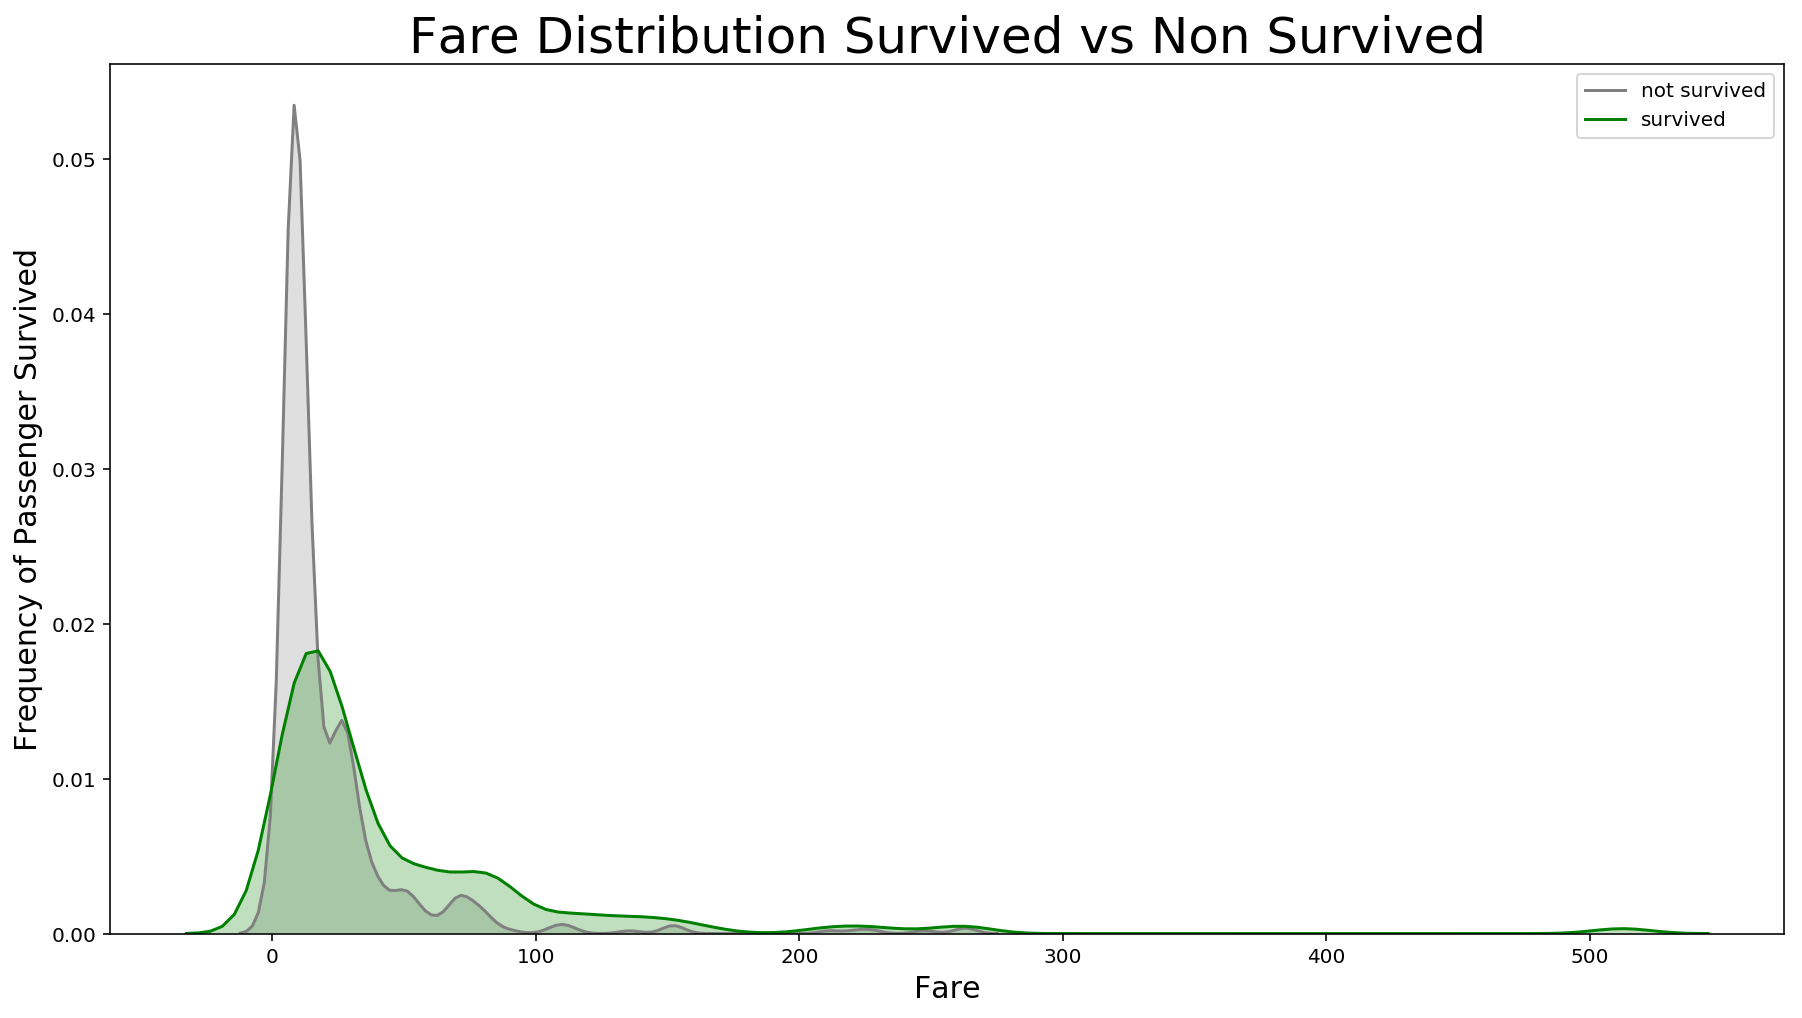

In [ ]:
fig=plt.subplots(figsize=(15,8))
ax=sns.kdeplot(train[train.Survived==0].Fare,
               shade=True,
               color='gray',
               label='not survived')
ax=sns.kdeplot(train[train.Survived==1].Fare,
             shade=True,
             color='g',
             label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Fare", fontsize = 15)

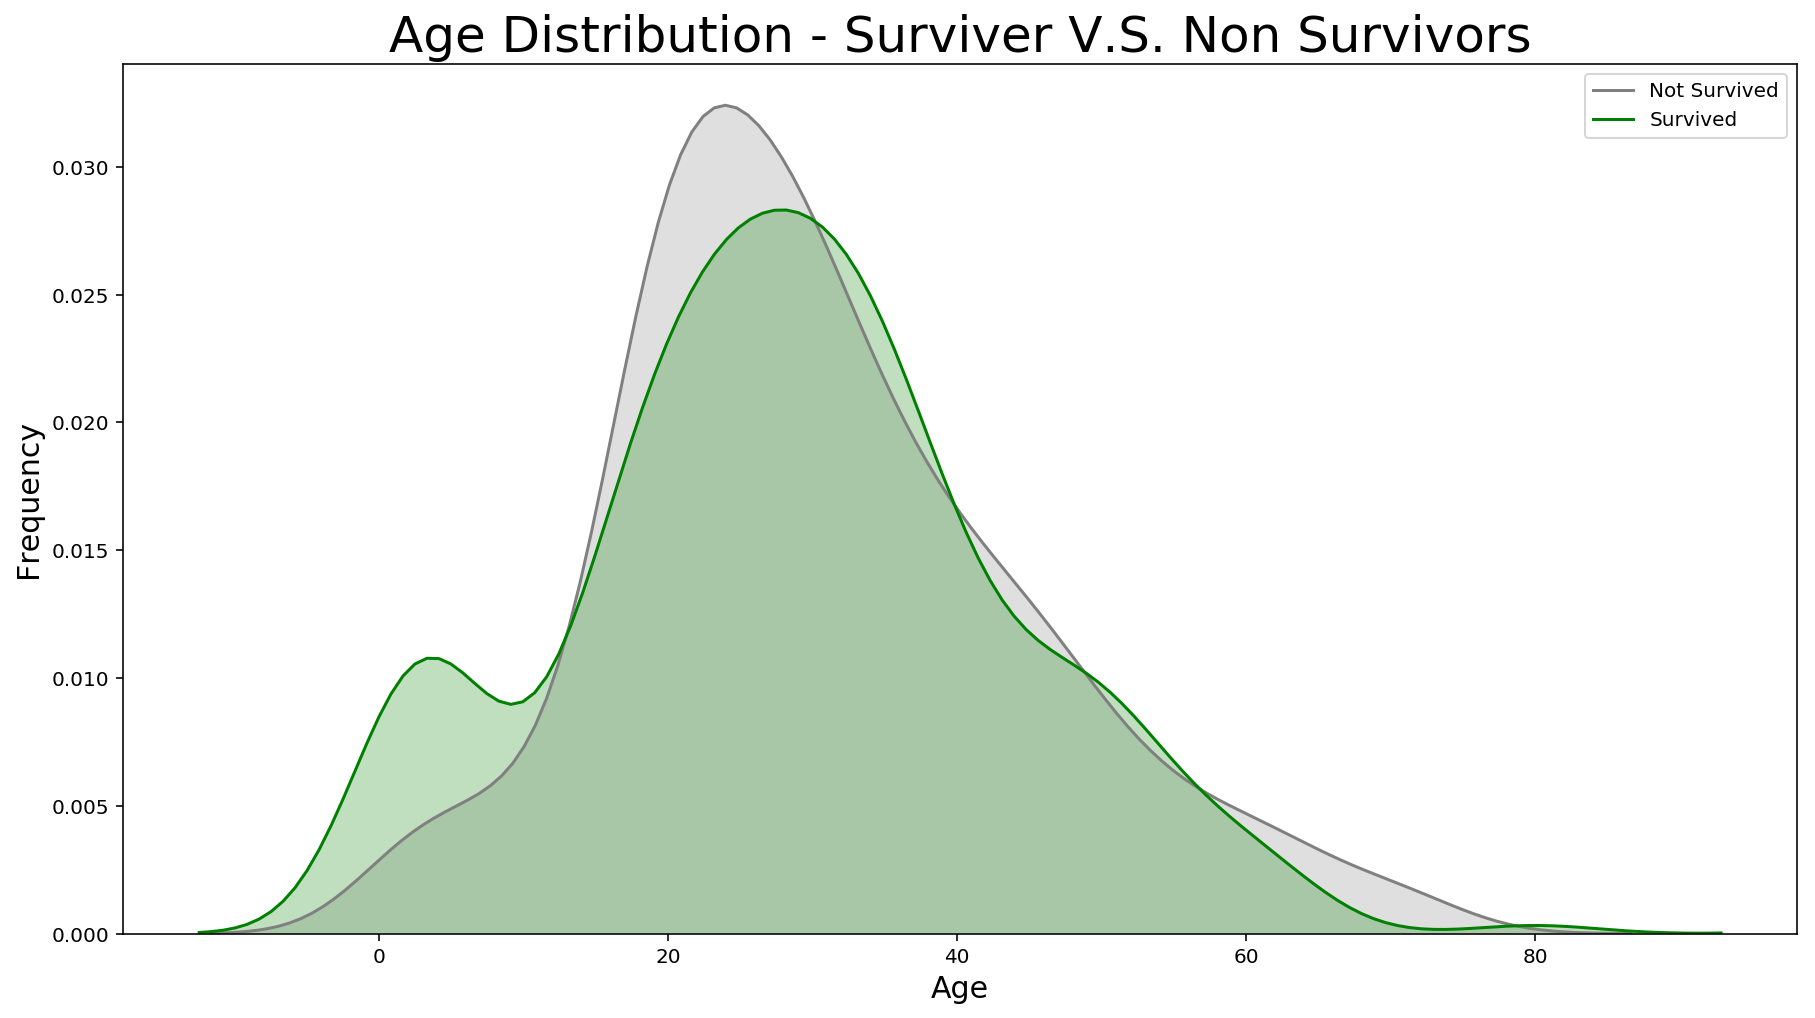

In [ ]:
plt.subplots(figsize=(15,8))
ax=sns.kdeplot(train[train.Survived==0].Age,
           shade=True,
           color="gray",
           label="Not Survived")
ax=sns.kdeplot(train[train.Survived==1].Age,
               shade=True,
               color='g',
               label="Survived")
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 25)
plt.xlabel("Age", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

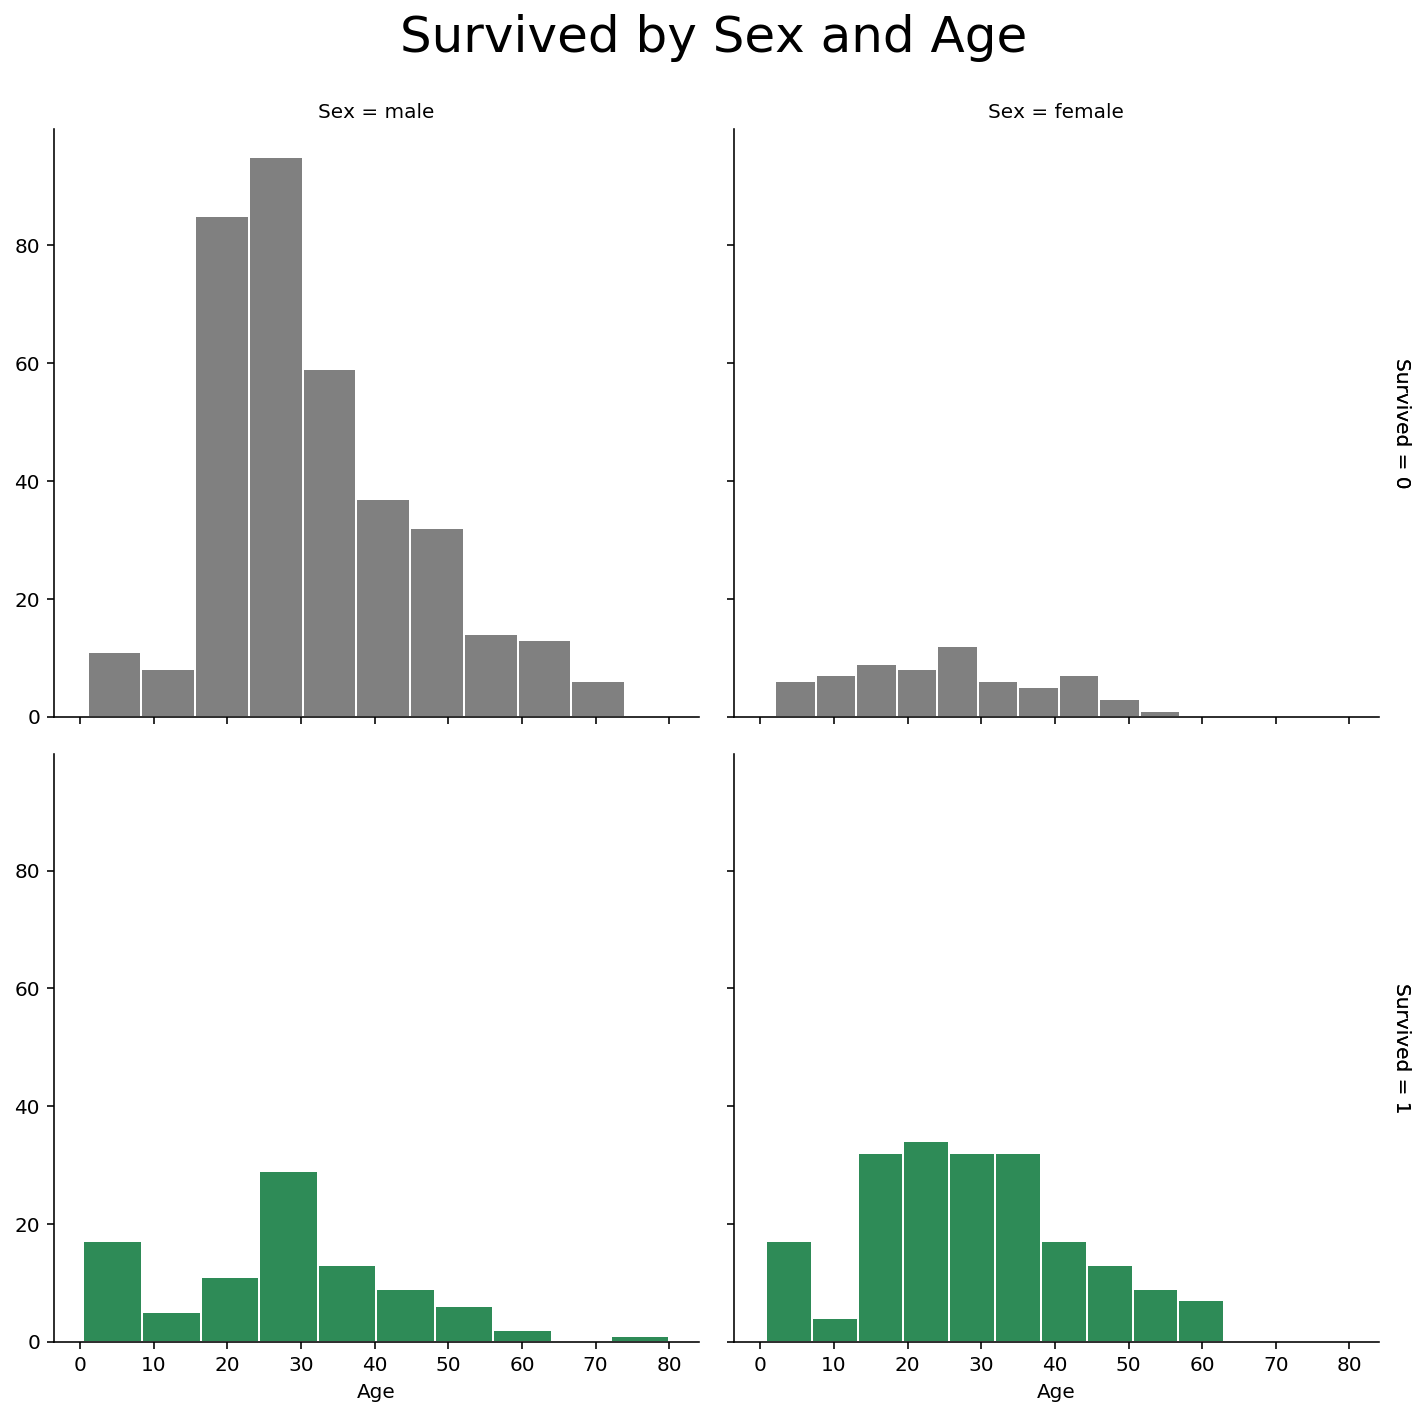

In [ ]:
pal = {1:"seagreen", 0:"gray"}
#plt.subplots(figsize=(15,8))
g=sns.FacetGrid(train,
                size=5,
                col="Sex",
                row="Survived",
                hue="Survived",
                margin_titles=True, 
                palette=pal)
#ax=g.map(sns.kdeplot,"Age",shade=True)
ax=g.map(plt.hist,"Age")
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)


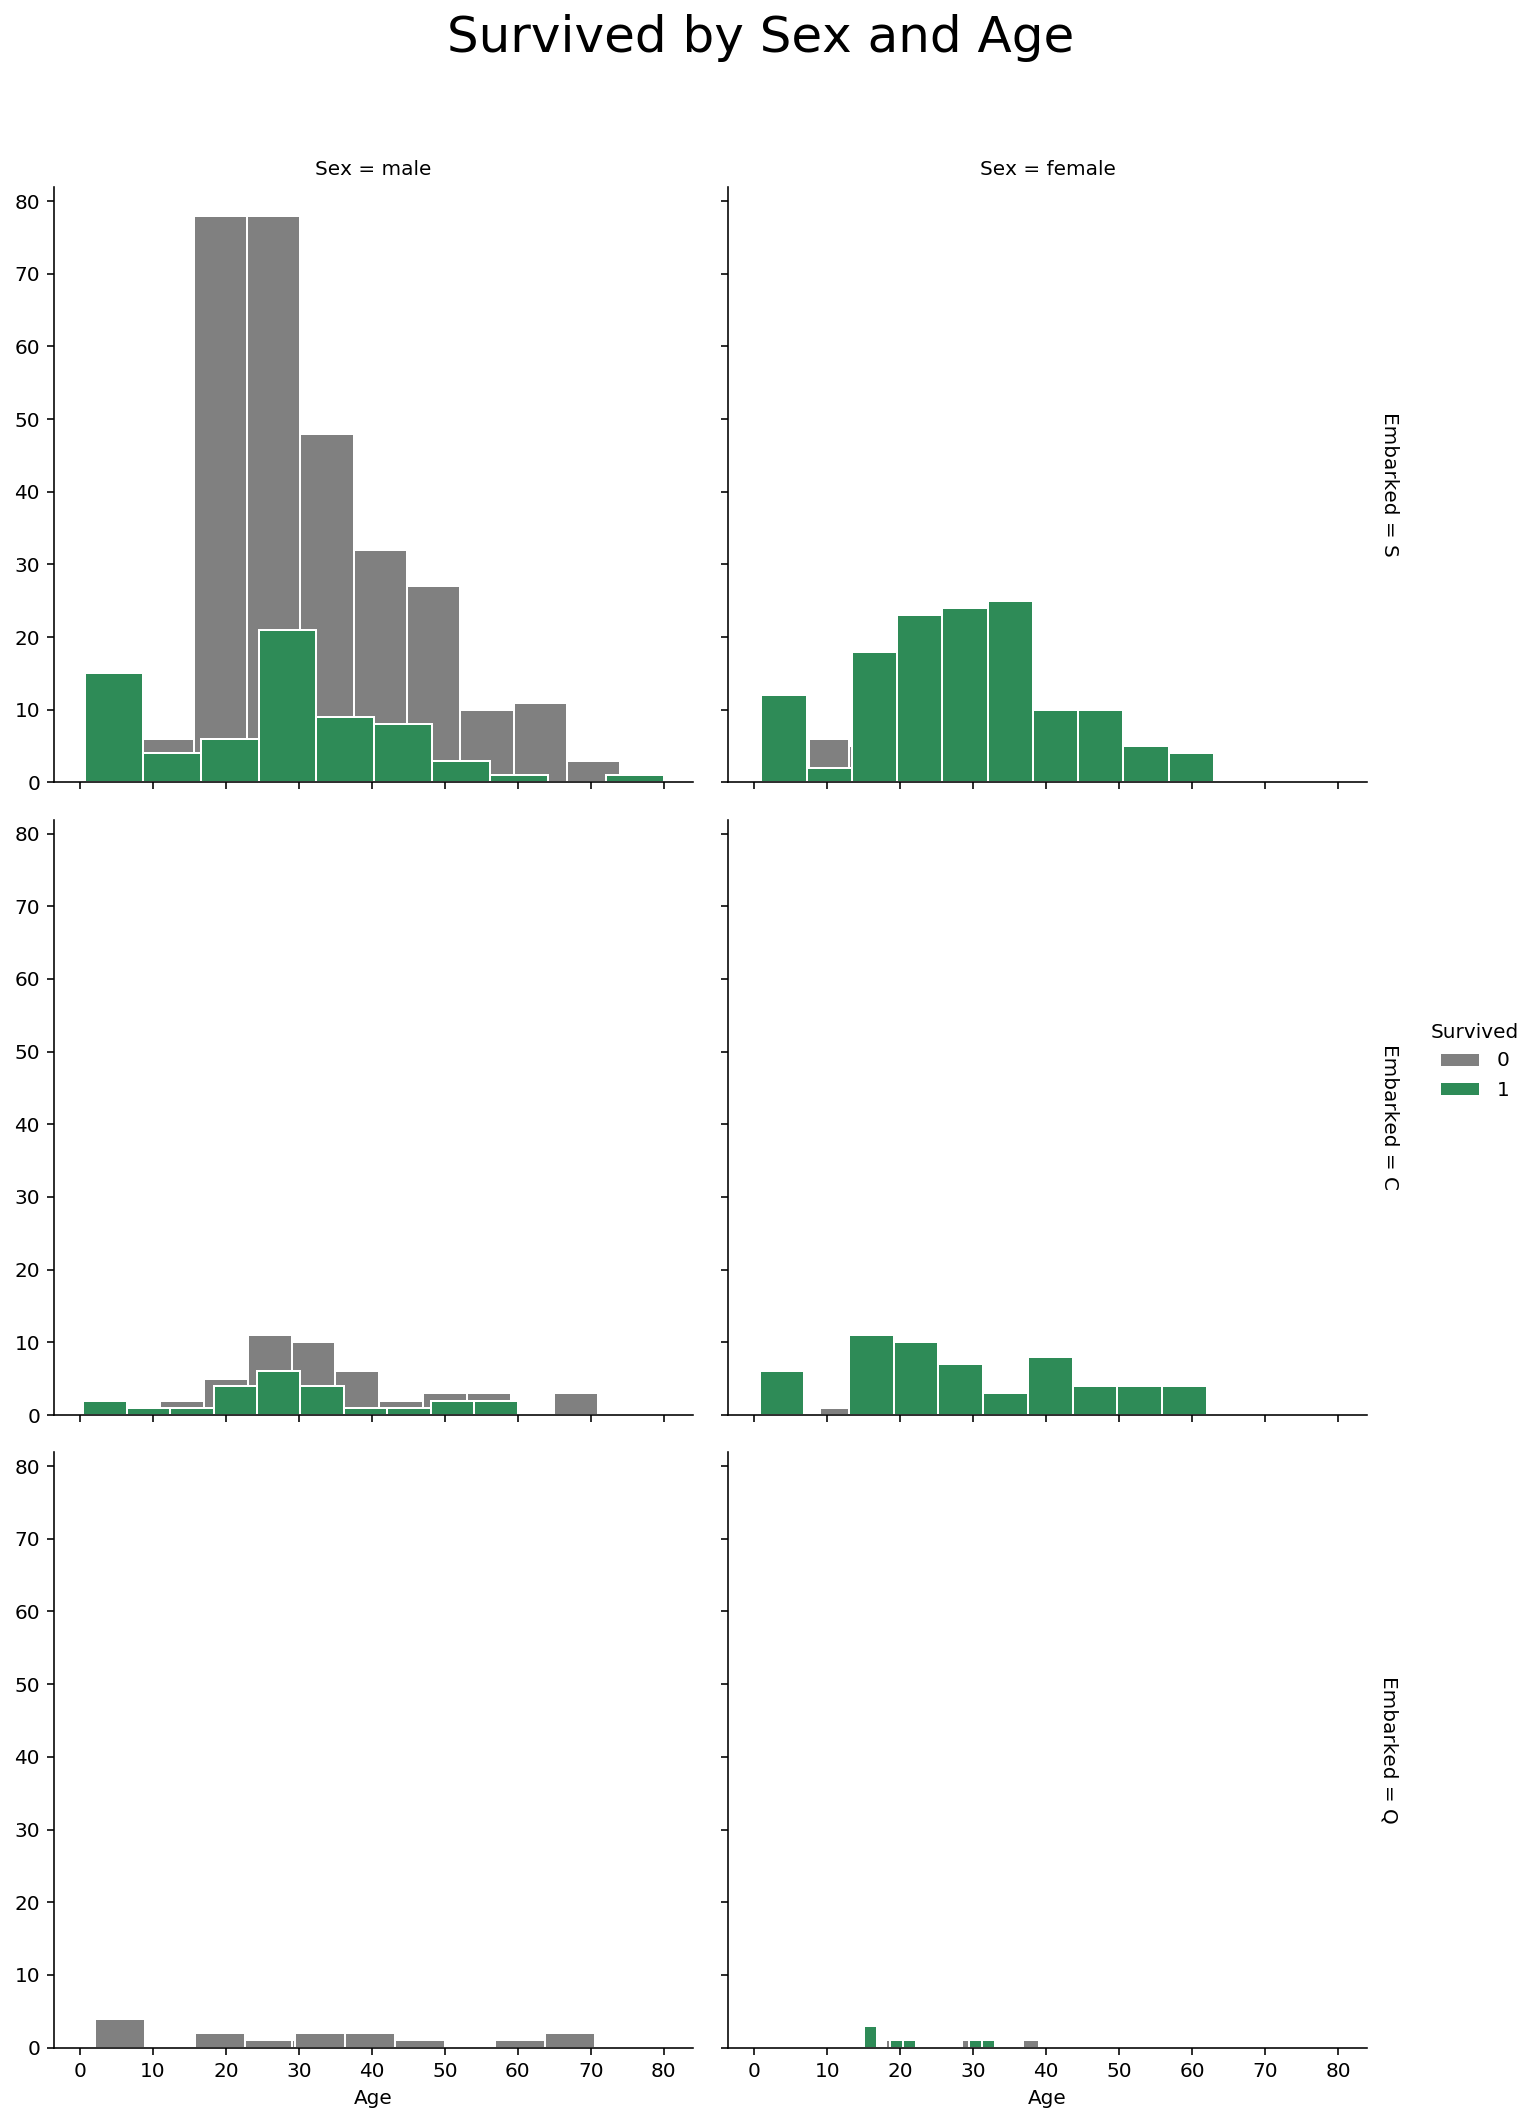

In [ ]:
g = sns.FacetGrid(train, 
                  size=5, 
                  col="Sex", 
                  row="Embarked", 
                  margin_titles=True, 
                  hue="Survived",
                  palette=pal
                  )
g = g.map(plt.hist, "Age", edgecolor='white').add_legend()
g.fig.suptitle("Survived by Sex and Age", size=25)
plt.subplots_adjust(top=0.90)

In [ ]:
print("Percentage of Females embarked from queens survived: " +str(100* len(train[(train.Embarked=="Q") & (train.Survived==1) & (train.Sex=="female")])/len(train[(train.Embarked=="Q")  & (train.Sex=="female")]))+"%")
print("Percentage of Males embarked from queens survived: " +str(round(100* len(train[(train.Embarked=="Q") & (train.Survived==1) & (train.Sex=="male")])/len(train[(train.Embarked=="Q")  & (train.Sex=="male")]),2))+"%")

print("Percentage of passengers died boarded from queens Southampton: " +str(100* round(len(train[(train.Embarked=="S") & (train.Survived==0) ])/len(train[(train.Embarked=="S")  ]),2))+"%")
print("Percentage of passengers lived boarded from queens Cherbourg: " +str(100* round(len(train[(train.Embarked=="C") & (train.Survived==1)])/len(train[(train.Embarked=="C") ]),1))+"%")


Percentage of Females embarked from queens survived: 75.0%
Percentage of Males embarked from queens survived: 7.32%
Percentage of passengers died boarded from queens Southampton: 66.0%
Percentage of passengers lived boarded from queens Cherbourg: 60.0%


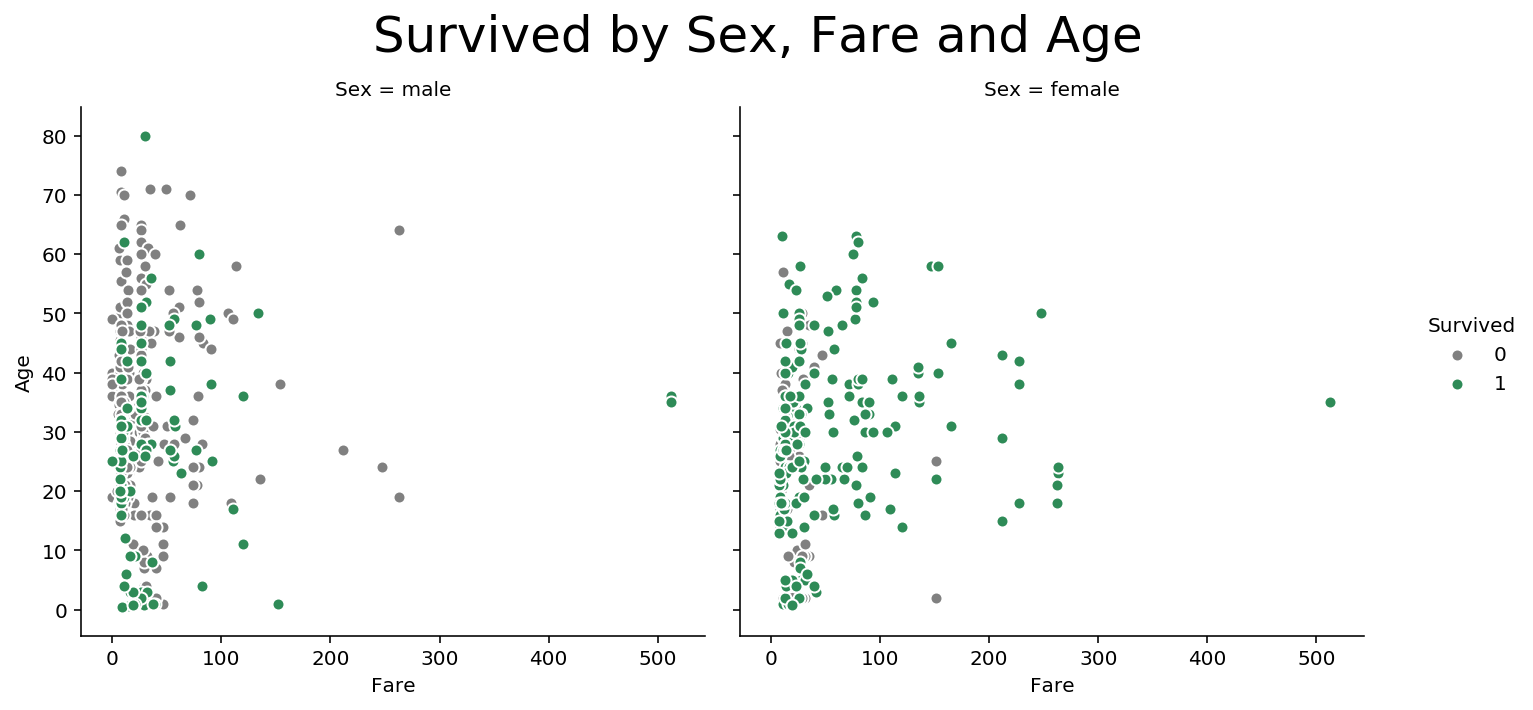

In [ ]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

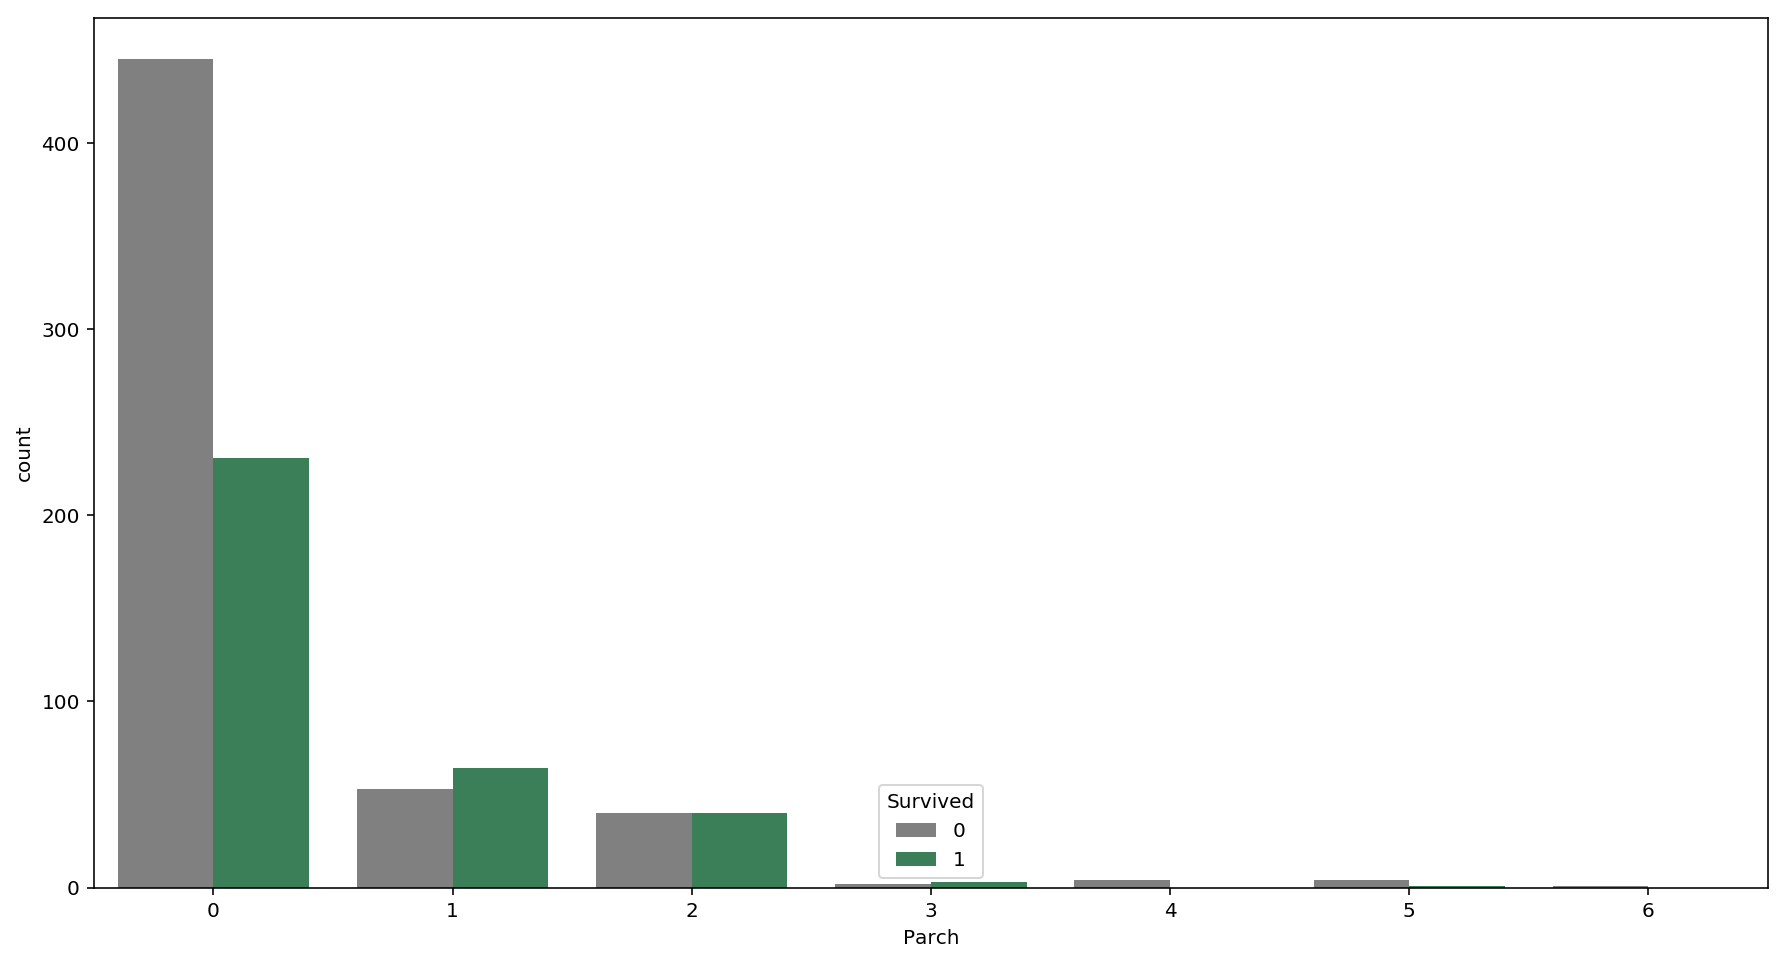

In [ ]:
train=train[train.Fare<500]
plt.subplots(figsize=(15,8))
ax=sns.countplot(data=train,x="Parch",hue='Survived',palette=pal)

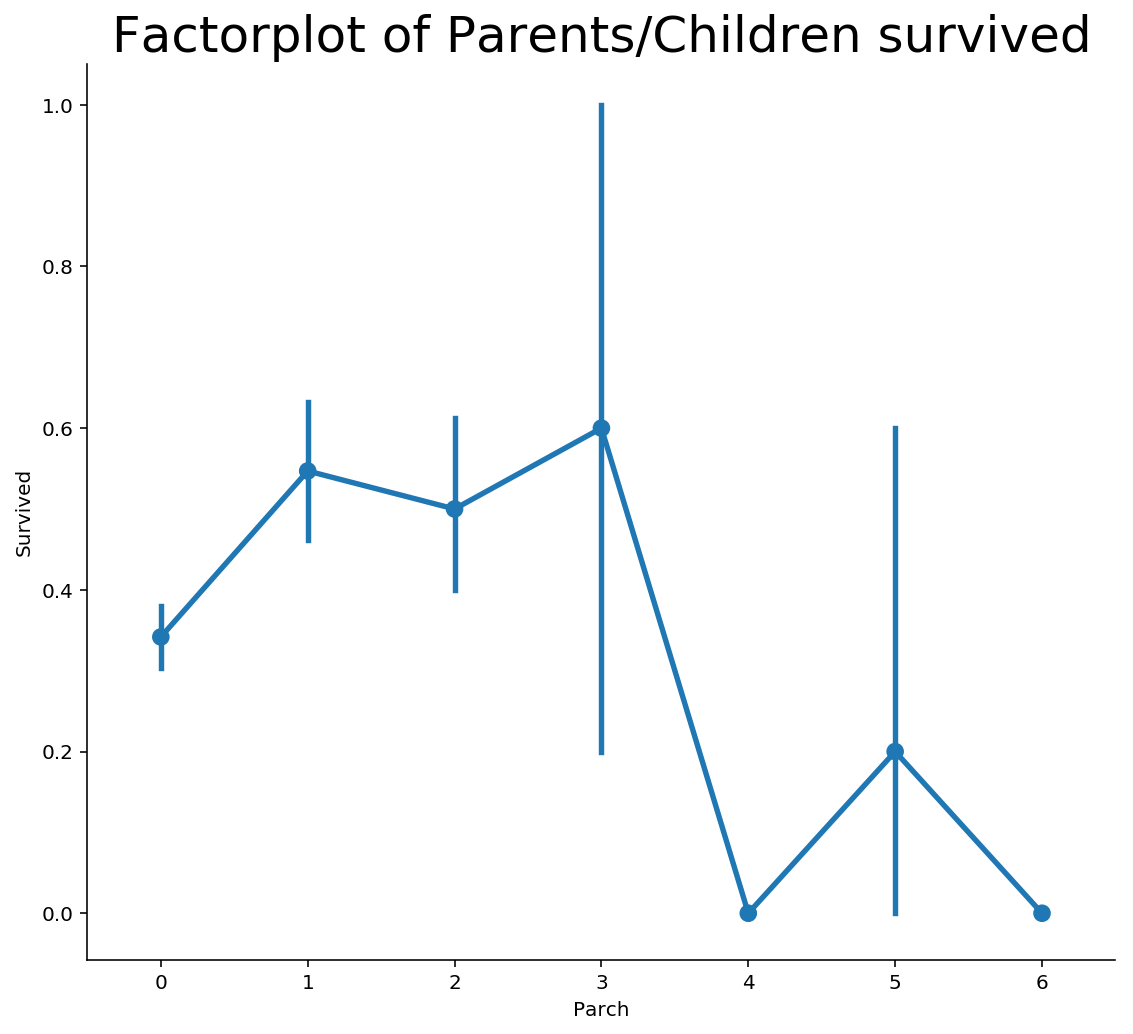

In [ ]:
train = train[train.Fare < 500]
## factor plot
sns.factorplot(x = "Parch", y = "Survived", data = train,kind = "point",size = 8)
plt.title("Factorplot of Parents/Children survived", fontsize = 25)
plt.subplots_adjust(top=0.85)

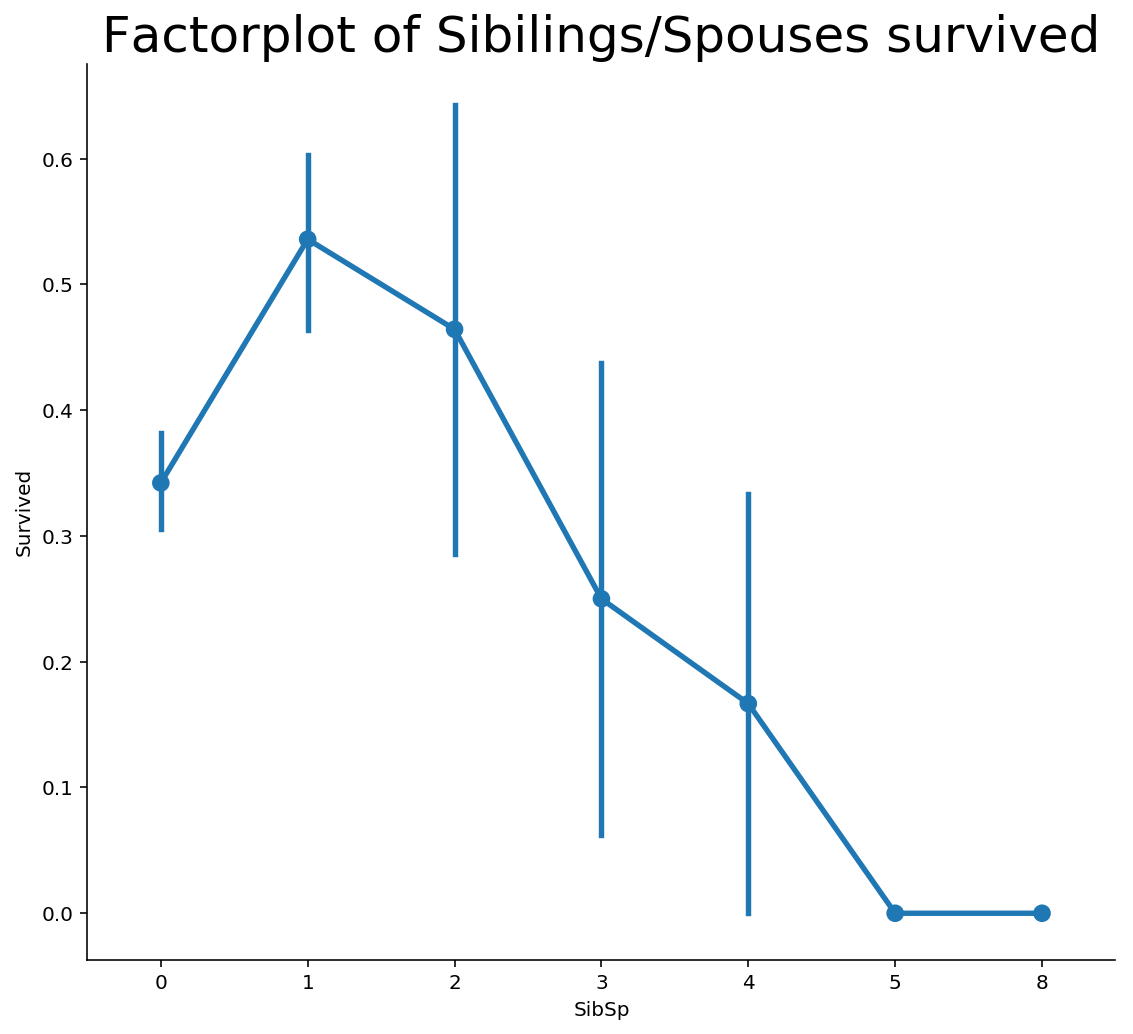

In [ ]:
sns.factorplot(x =  "SibSp", y = "Survived", data = train,kind = "point",size = 8)
plt.title('Factorplot of Sibilings/Spouses survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

In [ ]:
# Placing 0 for female and
# 1 for male in the "Sex" column.
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

In [ ]:
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Survived         0
dtype: int64

In [ ]:
train[["Pclass","Survived"]].groupby("Pclass").mean()
train[['Pclass', 'Survived']].groupby("Pclass").mean().reset_index()

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [ ]:
survived_summary=train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [ ]:
survived_summary=train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [ ]:
survived_summary = train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


In [ ]:
train["name_length"]=[len(i) for i in train.Name]
test["name_length"]=[len(i) for i in test.Name]

def name_length_group(size):
    a=''
    if (size<=20):
        a='short'
    elif (size<=35):
        a='medium'
    elif (size<=45):
        a='good'
    else:
        a='long'
    return a

train['nLength_group']=train['name_length'].map(name_length_group)
test['nLength_group']=test['name_length'].map(name_length_group)

In [ ]:
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

In [ ]:
train.groupby('title').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,name_length
title,,,,,,,,,
Capt,746.000000,1.000000,1.000000,70.000000,1.000000,1.000000,71.000000,0.000000,28.000000
Col,671.500000,1.000000,1.000000,58.000000,0.000000,0.000000,31.025000,0.500000,25.000000
Don,31.000000,1.000000,1.000000,40.000000,0.000000,0.000000,27.720800,0.000000,24.000000
Dr,545.857143,1.285714,0.857143,42.000000,0.571429,0.000000,49.168457,0.428571,24.142857
Jonkheer,823.000000,1.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,31.000000
Lady,557.000000,1.000000,0.000000,48.000000,1.000000,0.000000,39.600000,1.000000,65.000000
Major,493.500000,1.000000,1.000000,48.500000,0.000000,0.000000,28.525000,0.500000,31.500000
Master,414.975000,2.625000,1.000000,4.574167,2.300000,1.375000,34.703125,0.575000,29.250000
Miss,409.712707,2.314917,0.000000,21.682759,0.718232,0.552486,41.209302,0.696133,26.237569


In [ ]:
#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]



#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## test data
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

In [ ]:
train.groupby('title').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,name_length
title,,,,,,,,,
Master,414.975000,2.625000,1.000000,4.574167,2.300000,1.375000,34.703125,0.575000,29.250000
Miss,412.798913,2.298913,0.000000,21.756757,0.706522,0.543478,41.253738,0.701087,26.315217
Mr,453.510680,2.415534,1.000000,32.352273,0.289320,0.151456,22.546851,0.153398,23.345631
Mrs,452.500000,1.992063,0.000000,35.788991,0.690476,0.825397,45.330290,0.793651,41.531746
rare,547.043478,1.347826,0.869565,45.545455,0.347826,0.086957,37.169748,0.347826,29.826087


In [ ]:
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

In [ ]:
def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

In [ ]:
train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

In [ ]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

In [ ]:
train.Ticket.value_counts().sample(10)


PC 17590           1
347054             2
PC 17754           1
110813             1
248731             1
358585             2
17463              1
SC/AH Basle 541    1
17764              1
112053             1
Name: Ticket, dtype: int64

In [ ]:
train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

(array([606., 139.,  63.,  30.,  15.,  16.,   2.,   0.,   9.,   8.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 10 Patch objects>)

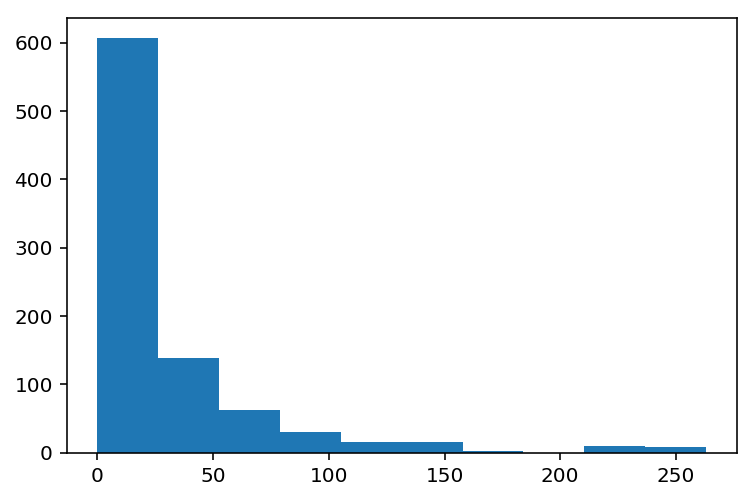

In [ ]:
plt.hist(train.Fare)

In [ ]:
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

(array([667., 152.,  28.,  21.,   5.,   7.,   3.,   0.,   0.,   5.]),
 array([  0.    ,  22.7525,  45.505 ,  68.2575,  91.01  , 113.7625,
        136.515 , 159.2675, 182.02  , 204.7725, 227.525 ]),
 <a list of 10 Patch objects>)

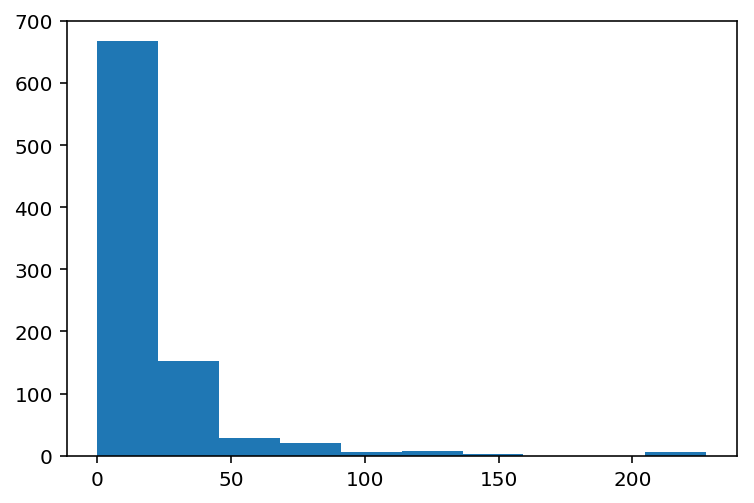

In [ ]:
plt.hist(train.calculated_fare)

In [ ]:
def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

In [ ]:
train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)

In [ ]:
train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)

In [ ]:
train.keys()

Index(['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived',
       'name_length', 'family_size', 'is_alone', 'calculated_fare',
       'title_ Master', 'title_ Miss', 'title_ Mr', 'title_ Mrs',
       'title_ rare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'nLength_group_good',
       'nLength_group_long', 'nLength_group_medium', 'nLength_group_short',
       'family_group_large', 'family_group_loner', 'family_group_small',
       'fare_group_Very_low', 'fare_group_high', 'fare_group_low',
       'fare_group_mid', 'fare_group_very_high'],
      dtype='object')

In [ ]:
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

In [ ]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
#train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
#test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

In [ ]:
train

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,0,22.0,1,1,0,0,3.625000,0,0,1,...,1,0,0,0,1,1,0,0,0,0
1,1,38.0,0,1,0,0,35.641650,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,26.0,0,0,0,1,7.925000,0,1,0,...,1,0,0,1,0,0,0,1,0,0
3,1,35.0,0,1,0,0,26.550000,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,35.0,1,0,0,1,8.050000,0,0,1,...,1,0,0,1,0,0,0,1,0,0
5,0,NaN,1,0,0,1,8.458300,0,0,1,...,0,1,0,1,0,0,0,1,0,0
6,0,54.0,1,0,0,1,51.862500,0,0,1,...,1,0,0,1,0,0,0,0,0,1
7,0,2.0,1,3,1,0,4.215000,1,0,0,...,1,0,1,0,0,0,0,1,0,0
8,1,27.0,0,0,2,0,3.711100,0,0,0,...,0,0,0,0,1,1,0,0,0,0
9,1,14.0,0,1,0,0,15.035400,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test);

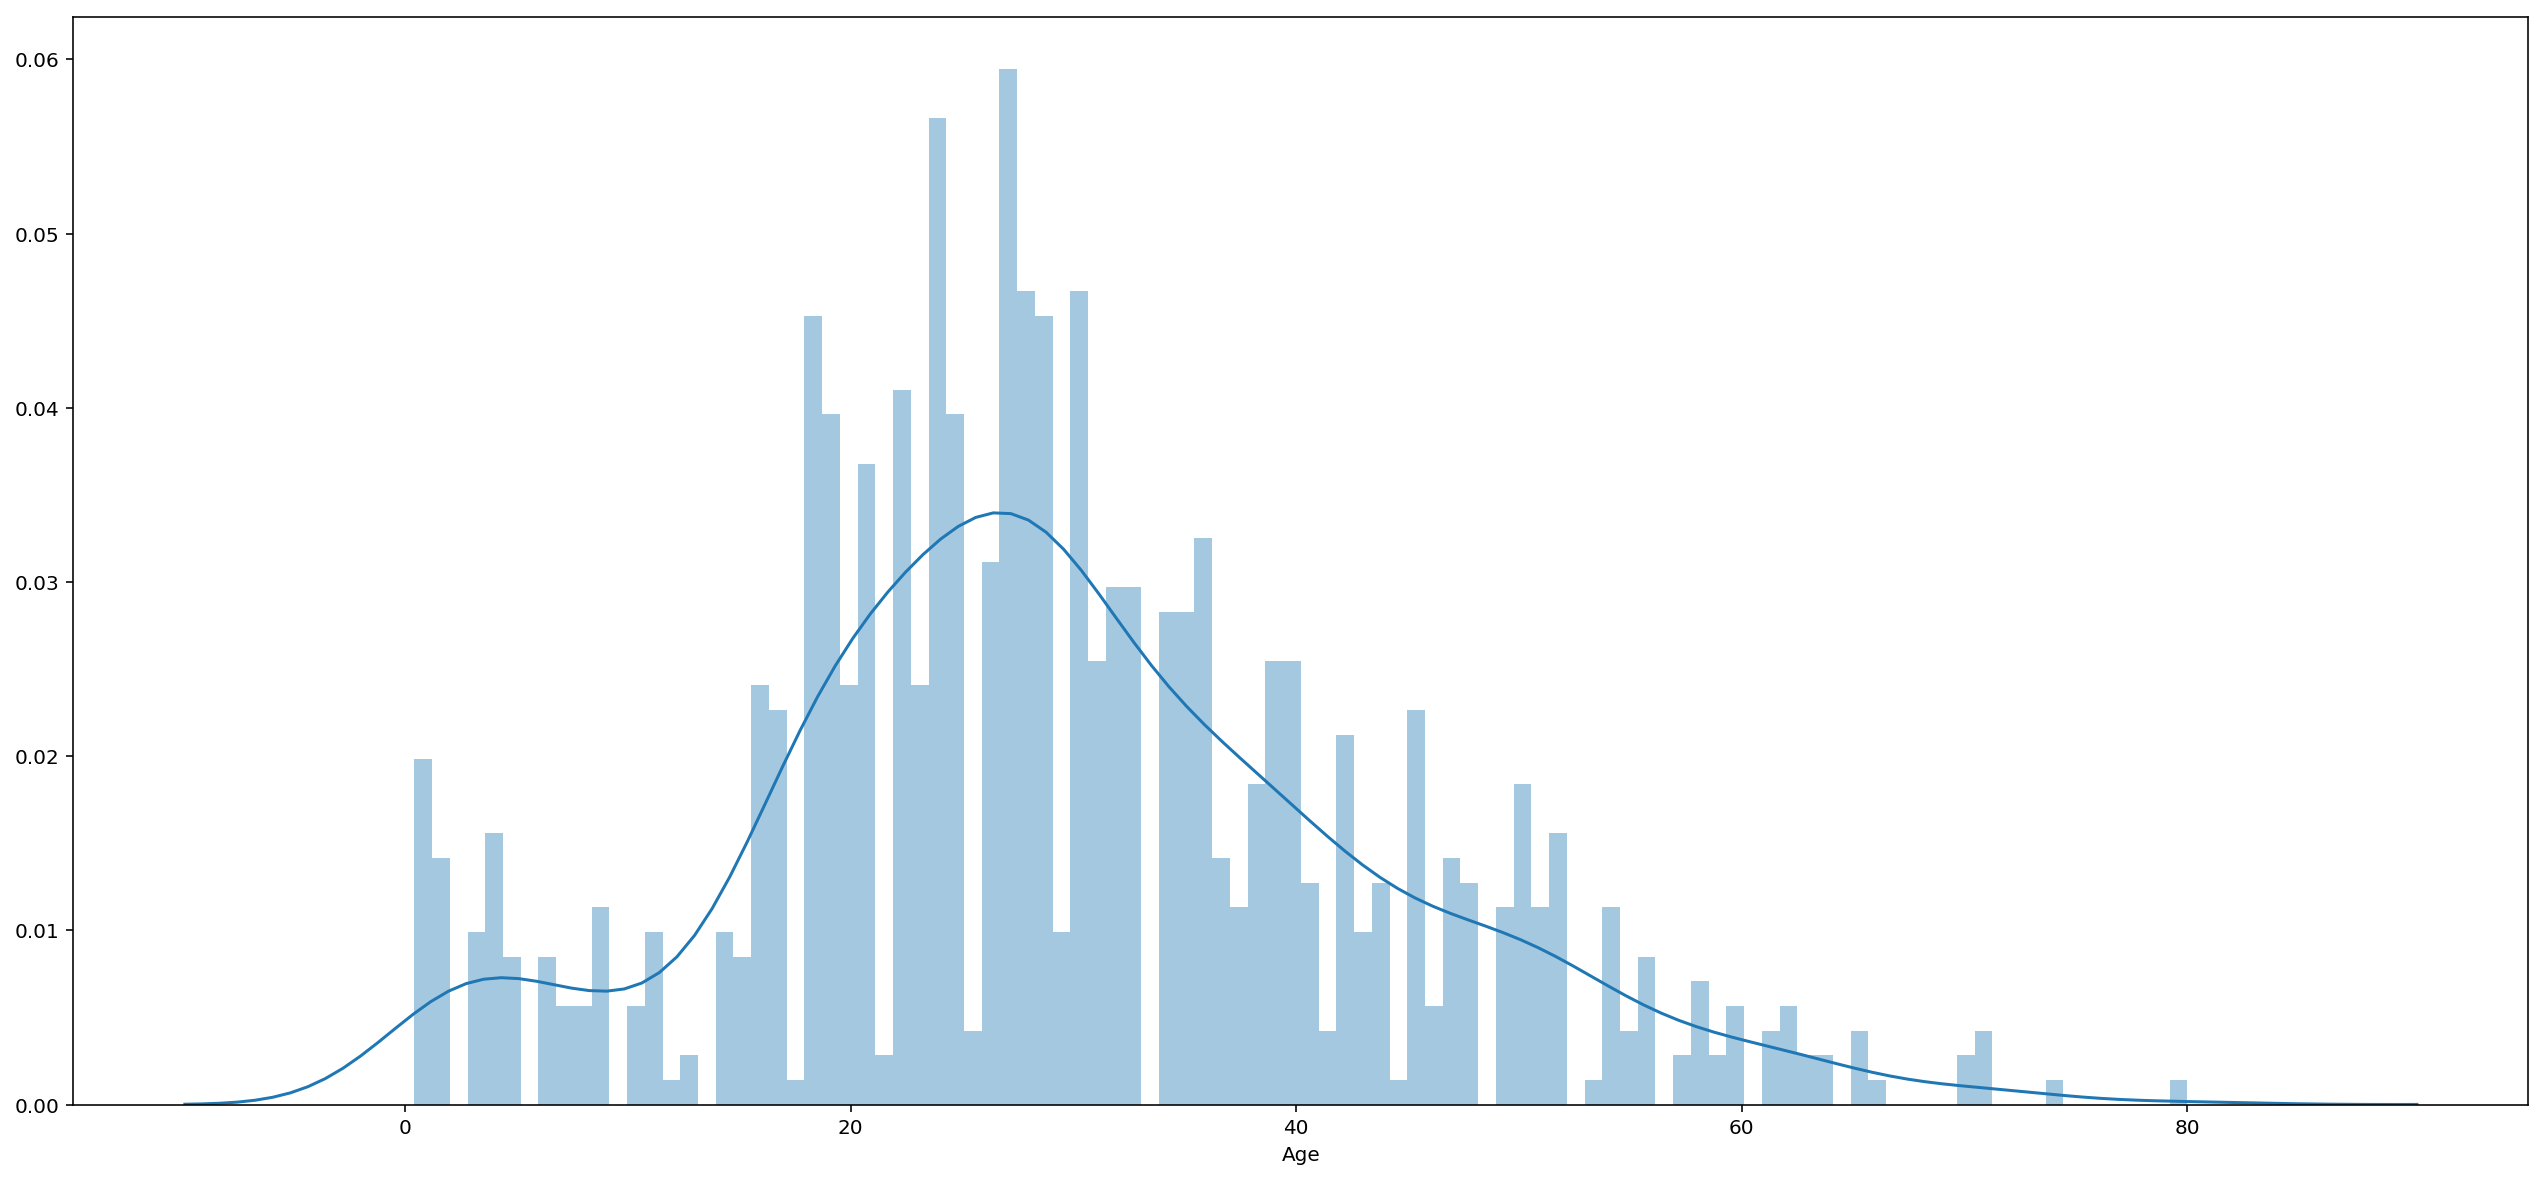

In [ ]:
plt.subplots(figsize=(22,10))
sns.distplot(train.Age,bins=100,kde=True,rug=False,norm_hist=False)

In [ ]:
## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

In [ ]:
train["age_group"]=train.Age.map(age_group_fun)
test["age_group"]=test.Age.map(age_group_fun)
## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

"train.drop('Age', axis=1, inplace=True)\ntest.drop('Age', axis=1, inplace=True)"

In [ ]:
X=train.drop(['Survived'],axis=1)
y=train["Survived"]


In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    X, y, test_size=0.33, random_state=0)

In [ ]:
train.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
643,1,29.465287,1,0,0,1,56.495800,0,0,1,...,0,1,0,0,0,0,0,0,0,0
787,0,8.000000,1,4,1,0,4.854167,1,0,0,...,0,0,0,1,0,0,0,0,0,0
304,0,28.393965,1,0,0,1,8.050000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
799,0,30.000000,0,1,1,0,8.050000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,14.000000,0,1,0,0,15.035400,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
headers=train_x.columns
train_x.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.5000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
187,45.000000,1,0,0,1,26.5500,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
849,41.833333,0,1,0,0,44.5521,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
433,17.000000,1,0,0,1,7.1250,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
651,18.000000,0,0,1,0,11.5000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)
test=sc.transform(test)

In [ ]:
pd.DataFrame(train_x,columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.253590,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.250224,-0.116841,-0.306468,-0.101015,5.099020,-0.286299,-0.196116
1,1.113742,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,2.222611,-0.250224,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.196116
2,0.888148,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,...,-0.455321,-0.30317,2.222611,-0.250224,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.196116
3,-0.880991,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.449921,-0.250224,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.196116
4,-0.809750,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,...,2.196253,-0.30317,-0.449921,-0.250224,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.196116


In [ ]:
print("Data Modelling Begins")

Data Modelling Begins


In [ ]:
train.calculated_fare = train.calculated_fare.astype(float)

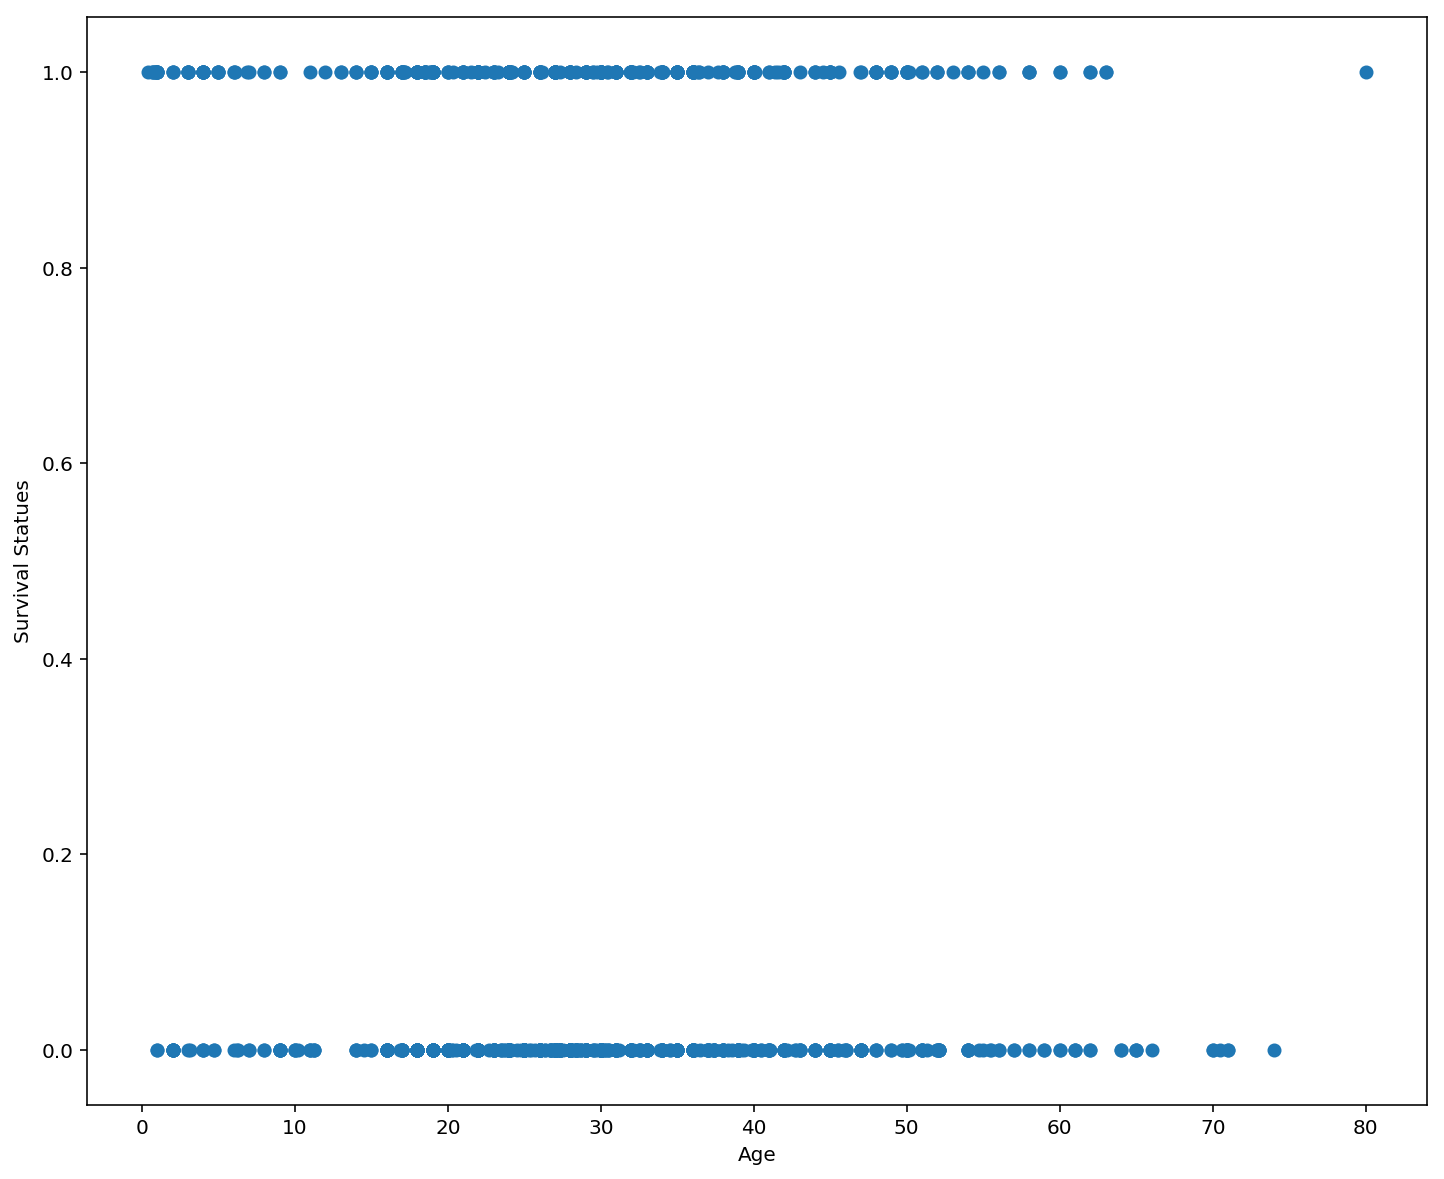

In [ ]:
plt.subplots(figsize=(12,10))
plt.scatter(train.Age,train.Survived)
plt.xlabel("Age")
plt.ylabel('Survival Statues');

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
logreg=LogisticRegression(solver='liblinear')
logreg.fit(train_x,train_y)
ypred=logreg.predict(test_x)
print("So, Our accuracy Score is: {}".format(round(accuracy_score(ypred,test_y),4)))

So, Our accuracy Score is: 0.7959


In [ ]:
from sklearn.metrics import roc_curve, auc
y_score=logreg.decision_function(test_x)
FPR, TPR, _ = roc_curve(test_y,y_score)

In [ ]:
from sklearn.metrics import precision_recall_curve
print("/================Imported Script (Begins)=================\\")
print('some test code')
print("\================Imported Script (Ends)===================/")

/================Imported Script (Begins)=================\
some test code
\================Imported Script (Ends)===================/


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# call the model object Logistic regression with default values
logreg = LogisticRegression(penalty= 'l2' , 
                                              dual=False, 
                                              tol=0.0001, 
                                              C=1.0, 
                                              fit_intercept=True, 
                                              intercept_scaling=1, 
                                              class_weight=None, 
                                              random_state=None, 
                                              solver='liblinear', 
                                              max_iter=100, 
                                              multi_class='ovr', 
                                              verbose=0, 
                                              warm_start=False, 
                                              n_jobs=None)
#fit the model with X=train_x, and y=train_y
logreg.fit(train_x,train_y)
#predict the test_x to class a or class b (train sample of whose we know the correct hypothesis )
y_pred = logreg.predict(test_x)

#model accuracy
print("So, Our accuray Score is: {}".format(round(accuracy_score(y_pred,test_y),4)))



So, Our accuray Score is: 0.7959


##ROC_curve

0.8341300883673765


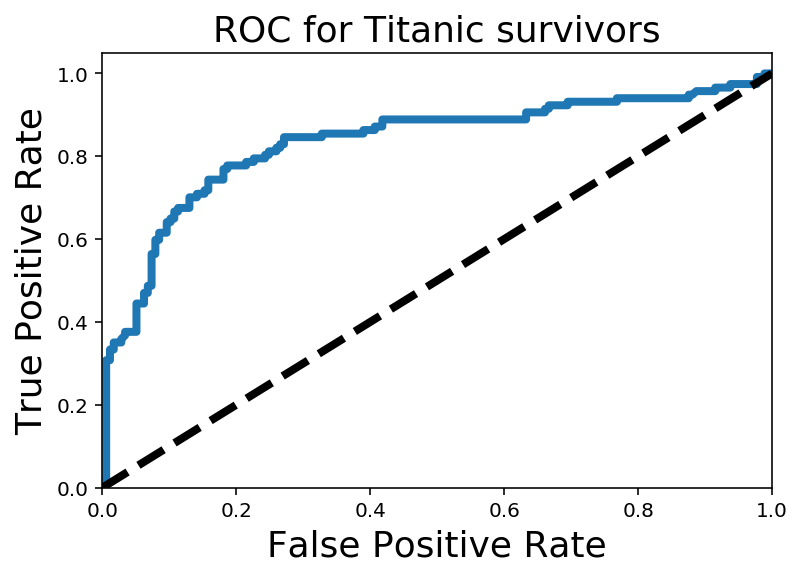

In [ ]:
from sklearn.metrics import roc_curve, auc

#ratherthan giving class it gives us the scores
y_score = logreg.decision_function(test_x)

# 
FPR, TPR, _ = roc_curve(test_y,y_score)
ROC_AUC = auc(FPR, TPR)
print(ROC_AUC)


#plot of ROC curve
plt.figure(figsize =[6,4])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
# call the model object Logistic regression with default values
logreg = LogisticRegression(penalty= 'l2' , 
                            dual=False, 
                            tol=0.0001, 
                            C=1.0, #coeffiecent of penality term
                            fit_intercept=True, 
                            intercept_scaling=1, 
                            class_weight=None, 
                            random_state=None, 
                            solver='liblinear', 
                            max_iter=100, 
                            multi_class='ovr', 
                            verbose=0, 
                            warm_start=False, 
                            n_jobs=None)
#fit the model with X=train_x, and y=train_y
logreg.fit(train_x,train_y)
#predict the test_x (train sample of whose we know the correct hypothesis )
y_score=logreg.predict(test_x)

#model accuracy compared between y_score, test_y

print("So, Our accuray Score is: {}".format(round(accuracy_score(y_score,test_y),4)))

So, Our accuray Score is: 0.7959


0.8341300883673765


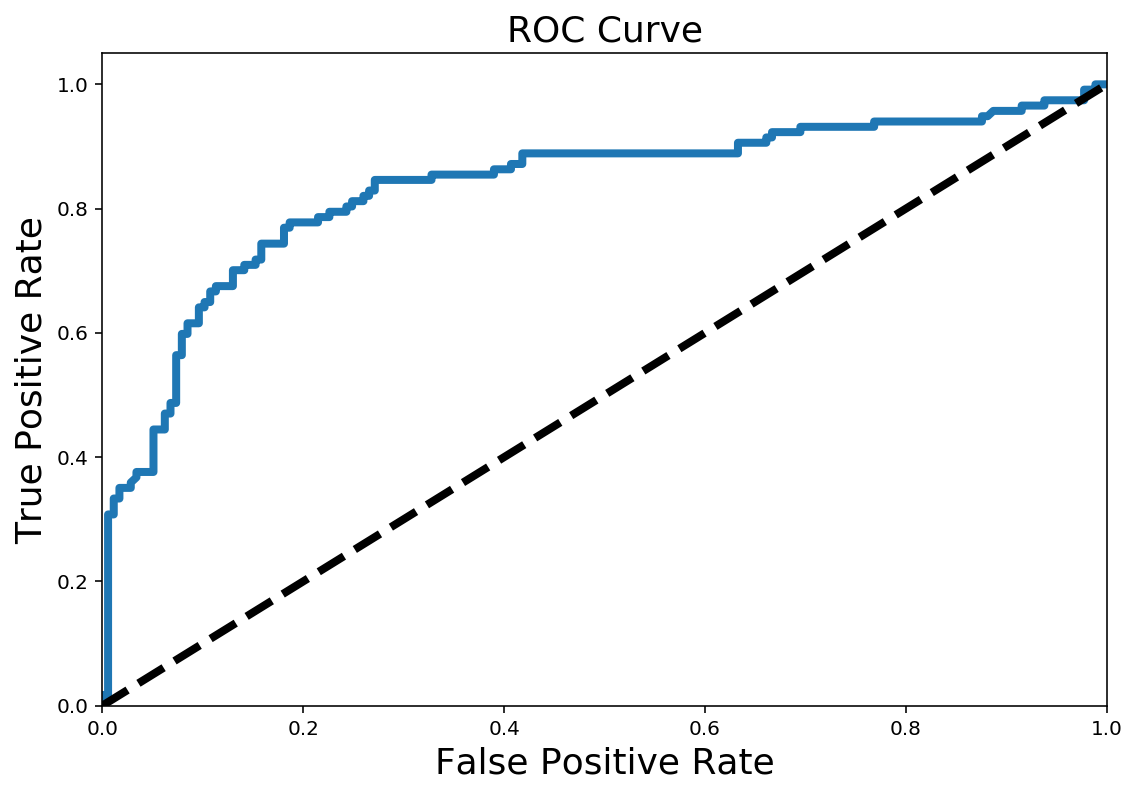

In [ ]:
from sklearn.metrics import roc_curve, auc

#ratherthan giving class it gives us the scores
y_score = logreg.decision_function(test_x)

# 
FPR, TPR, _ = roc_curve(test_y,y_score)
ROC_AUC = auc(FPR, TPR)
print(ROC_AUC)


#plot of ROC curve
plt.figure(figsize =[9,6])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC Curve', fontsize= 18)
plt.show()

In [ ]:
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

0.8341300883673765


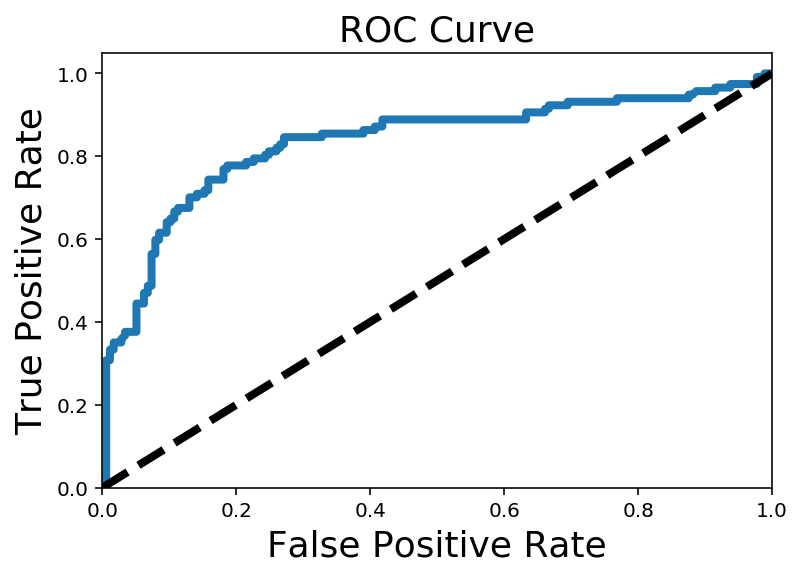

In [ ]:
from sklearn.metrics import roc_curve, auc

#ratherthan giving class it gives us the scores
try:
  y_score = logreg.decision_function(test_x)
except:
  print("Is 'logreg' defined?")

# 
FPR, TPR, _ = roc_curve(test_y,y_score)
ROC_AUC = auc(FPR, TPR)
print(ROC_AUC)


#plot of ROC curve
plt.figure(figsize =[6,4])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC Curve', fontsize= 18)
plt.show()

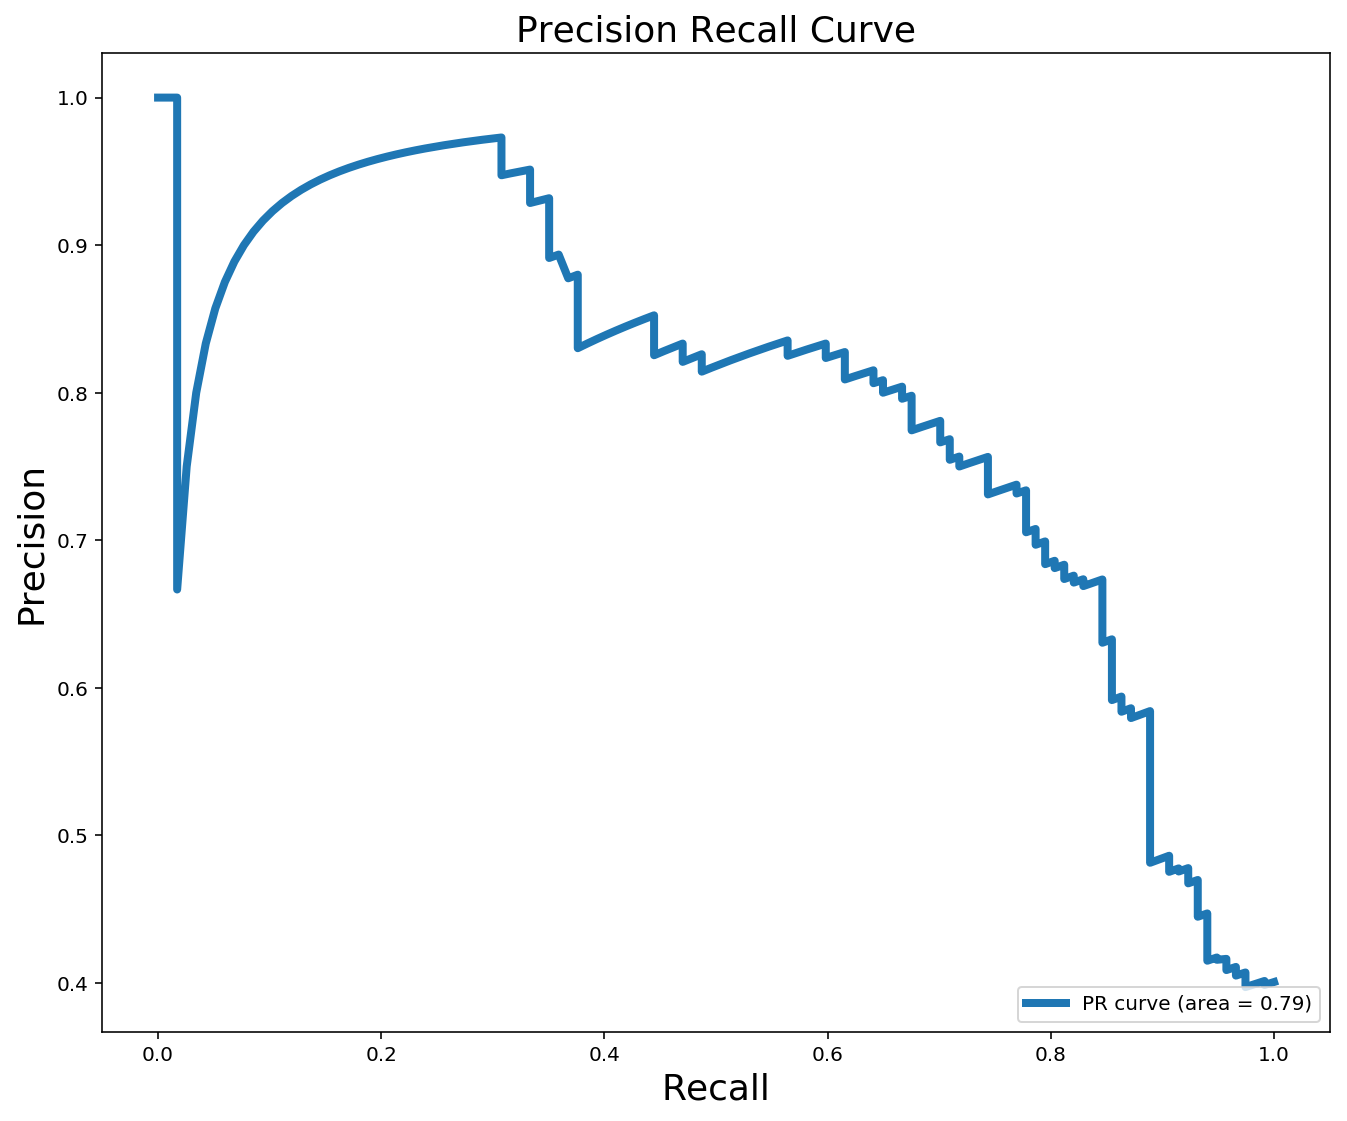

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

#ratherthan giving class it gives us the scores
try:
  y_score = logreg.decision_function(test_x)
except:
  print("Is 'logreg' defined?")

precision, recall, _ = precision_recall_curve(test_y, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve', fontsize=18)
plt.legend(loc="lower right")
plt.show()